In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import psycopg2
import scipy.stats as stats
import numpy as np
import sweetviz as sv


In [19]:
db_params = {
    'dbname': 'stock_data',
    'user': 'postgres',
    'password': 'nishat',
    'host': 'localhost',
    'port': '5432'
}

# Connect to the PostgreSQL database
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

# Create a table for storing stock data (X)
cursor.execute('''
    SELECT * FROM stock_data_2023_onwards ORDER BY random() ;
''')
stock_data_2023_onwards = cursor.fetchall()



columns_names = ['id','ticker', 'date', 'open', 'high', 'low', 'close', 'volume']
stock_data_2023_onwards = pd.DataFrame(stock_data_2023_onwards)
stock_data_2023_onwards.columns = columns_names
stock_data_2023_onwards = stock_data_2023_onwards.drop(columns={"id"})
print(stock_data_2023_onwards)
# stocks_df = pd.DataFrame(stock_data)
# column_names = ["Index", "Ticker", "Date", "Open", "High", "Low", "Close", "Volume"]
# stocks_df.columns = column_names
# stocks_df = stocks_df.drop(columns={"Index"})
# print(stocks_df)

     ticker        date        open        high         low       close  \
0      TSLA  2023-01-30  178.050003  179.770004  166.500000  166.660004   
1       JPM  2024-05-22  199.000000  200.940002  197.690002  198.309998   
2       JPM  2023-12-15  161.140604  163.314438  160.458808  163.265030   
3      AMZN  2024-04-24  179.940002  180.320007  176.179993  176.589996   
4     GOOGL  2023-11-17  135.844088  135.904017  133.496776  135.154877   
...     ...         ...         ...         ...         ...         ...   
3625   MSFT  2023-07-24  343.165521  344.227223  339.652990  342.431244   
3626   TSLA  2023-01-23  135.869995  145.380005  134.270004  143.750000   
3627   AMZN  2024-04-30  181.089996  182.990005  174.800003  175.000000   
3628   NVDA  2024-02-02   63.965744   66.591404   63.681780   66.151466   
3629    UNH  2024-03-22  495.200012  495.829987  489.769989  490.070007   

         volume  
0     230878800  
1       9425300  
2      20305900  
3      34185100  
4      37

In [20]:
stock_data_2023_onwards.head()

ticker        date        open        high         low       close  \
0   TSLA  2023-01-30  178.050003  179.770004  166.500000  166.660004   
1    JPM  2024-05-22  199.000000  200.940002  197.690002  198.309998   
2    JPM  2023-12-15  161.140604  163.314438  160.458808  163.265030   
3   AMZN  2024-04-24  179.940002  180.320007  176.179993  176.589996   
4  GOOGL  2023-11-17  135.844088  135.904017  133.496776  135.154877   

      volume  
0  230878800  
1    9425300  
2   20305900  
3   34185100  
4   37240600

In [21]:
stock_data_2023_onwards.tail()

ticker        date        open        high         low       close  \
3625   MSFT  2023-07-24  343.165521  344.227223  339.652990  342.431244   
3626   TSLA  2023-01-23  135.869995  145.380005  134.270004  143.750000   
3627   AMZN  2024-04-30  181.089996  182.990005  174.800003  175.000000   
3628   NVDA  2024-02-02   63.965744   66.591404   63.681780   66.151466   
3629    UNH  2024-03-22  495.200012  495.829987  489.769989  490.070007   

         volume  
3625   26678100  
3626  203119200  
3627   94639800  
3628  476578000  
3629    2847000

In [22]:
stock_data_2023_onwards['ticker'].value_counts() 

ticker
TSLA     363
JPM      363
AMZN     363
GOOGL    363
NFLX     363
NVDA     363
META     363
UNH      363
AAPL     363
MSFT     363
Name: count, dtype: int64

In [23]:
stock_data_2023_onwards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  3630 non-null   object 
 1   date    3630 non-null   object 
 2   open    3630 non-null   float64
 3   high    3630 non-null   float64
 4   low     3630 non-null   float64
 5   close   3630 non-null   float64
 6   volume  3630 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 198.6+ KB


In [24]:
stock_data_2023_onwards.describe()

open         high          low        close        volume
count  3630.000000  3630.000000  3630.000000  3630.000000  3.630000e+03
mean    246.601754   249.489759   243.881900   246.816834  8.174150e+07
std     151.437273   152.875987   149.940047   151.430238  1.468400e+08
min      14.465714    14.555663    14.025966    14.256834  1.135000e+06
25%     136.277178   137.632762   134.970909   136.503338  9.431325e+06
50%     185.992755   188.035058   183.677312   185.971359  2.747920e+07
75%     354.903438   359.686668   350.713319   355.387901  6.549552e+07
max     653.520020   664.250000   644.729980   654.619995  1.543911e+09

 std -indicates how much the data varies from the mean, giving insight into the spread or volatility.

In [25]:
# Check for missing values
missing_values = stock_data_2023_onwards.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Drop rows with missing values (if any)
stock_data_2023_onwards = stock_data_2023_onwards.dropna()

# 1
def preparing_data( ticker):

    # # Filter the DataFrame for the given ticker
    # stock_df = df[df['ticker'] == ticker]
    
    # # Sort the DataFrame by date
    # stock_df = stock_df.sort_values(by='date')
    
    # # Reset the index
    # stock_df.reset_index(drop=True, inplace=True)
    
    # return stock_df
    
    stock = stock_data_2023_onwards['ticker'].isin([ticker])
    df = stock_data_2023_onwards[stock]
    df = df.sort_values(by='date')
    df.reset_index(drop=True, inplace=True)
    return df


google_df = preparing_data("GOOGL")
tesla_df = preparing_data("TSLA")
jpm_df = preparing_data("JPM")
netflix_df = preparing_data("NFLX")
amazon_df = preparing_data("AMZN")
unh_df = preparing_data("UNH")
apple_df = preparing_data("AAPL")
microsoft_df = preparing_data("MSFT")
meta_df = preparing_data("META")
nvidia_df = preparing_data("NVDA")
print(apple_df)

# List of ticker symbols for the companies
tickers = ["GOOGL", "TSLA", "JPM", "NFLX", "AMZN", "UNH", "AAPL", "MSFT", "META", "NVDA"]

# # Dictionary to store DataFrames for each company
# stock_data_dict = {ticker: preparing_data(stock_data_2023_onwards, ticker) for ticker in tickers}

# Access the DataFrame for a specific company
# apple_df = stock_data_dict["AAPL"]
print(apple_df)


Missing values:
ticker    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64
    ticker        date        open        high         low       close  \
0     AAPL  2023-01-03  129.390738  130.006501  123.322443  124.216301   
1     AAPL  2023-01-04  126.023879  127.781801  124.226236  125.497498   
2     AAPL  2023-01-05  126.262240  126.897870  123.908421  124.166641   
3     AAPL  2023-01-06  125.149893  129.400670  124.037535  128.735245   
4     AAPL  2023-01-09  129.579466  132.499401  129.003423  129.261642   
..     ...         ...         ...         ...         ...         ...   
358   AAPL  2024-06-06  195.690002  196.500000  194.169998  194.479996   
359   AAPL  2024-06-07  194.649994  196.940002  194.139999  196.889999   
360   AAPL  2024-06-10  196.899994  197.300003  192.149994  193.119995   
361   AAPL  2024-06-11  193.649994  207.160004  193.630005  207.149994   
362   AAPL  2024-06-12  207.369995  220.199997  206.899994  213.070007   

In [7]:
report=sv.analyze(stock_data_2023_onwards)

                                             |                                                                …


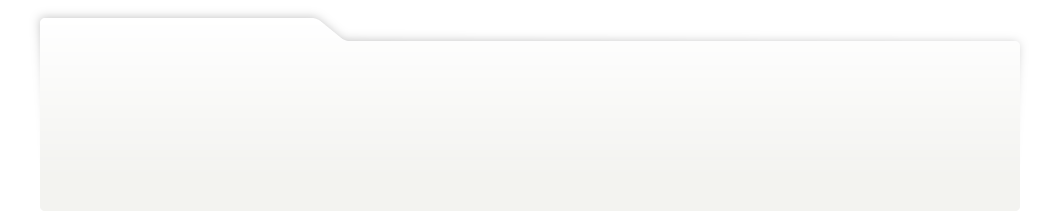
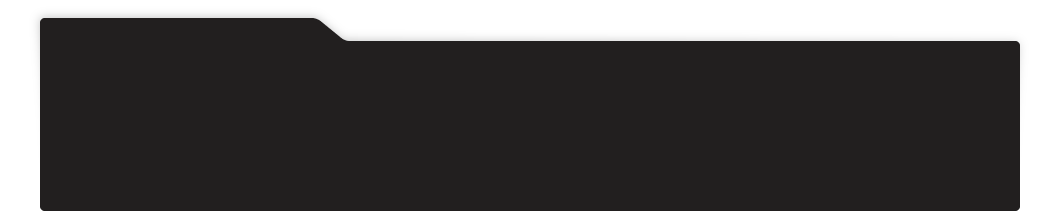
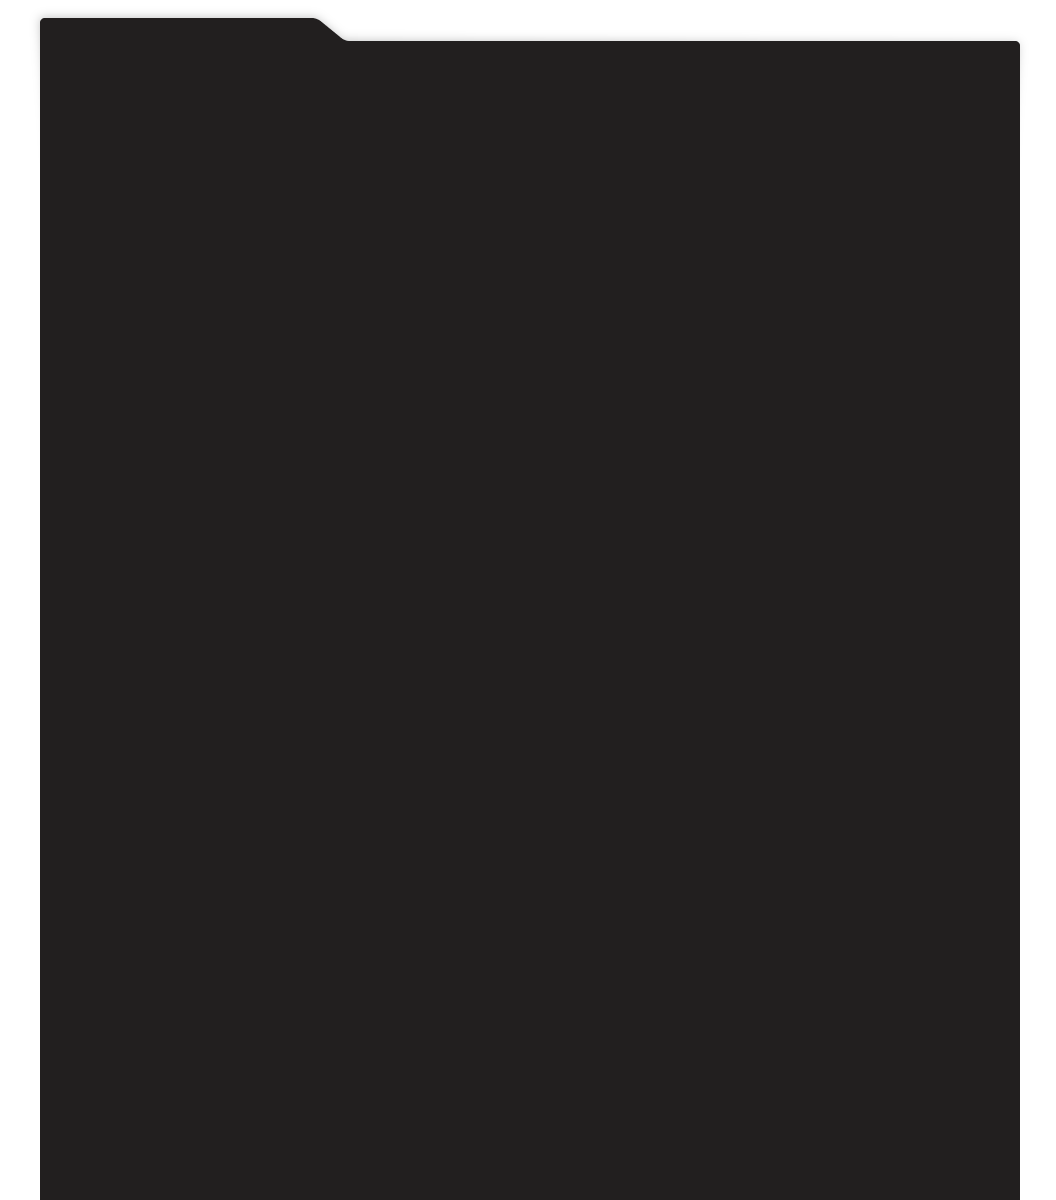
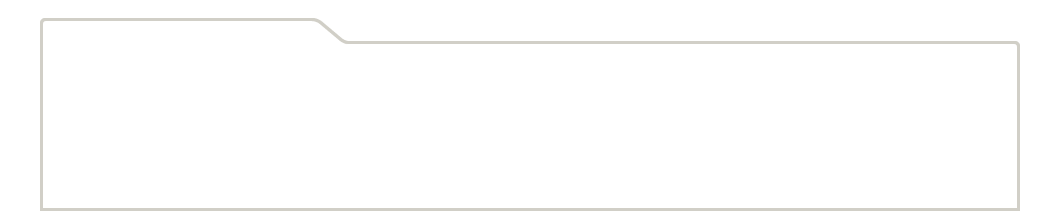
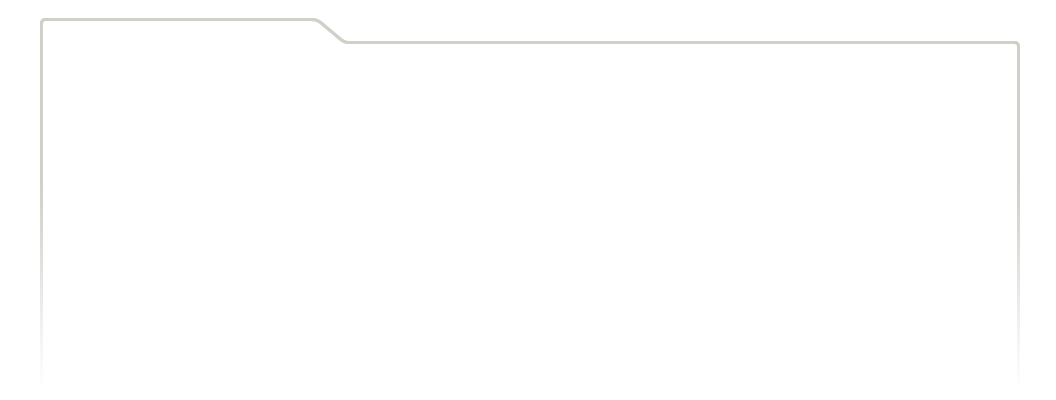
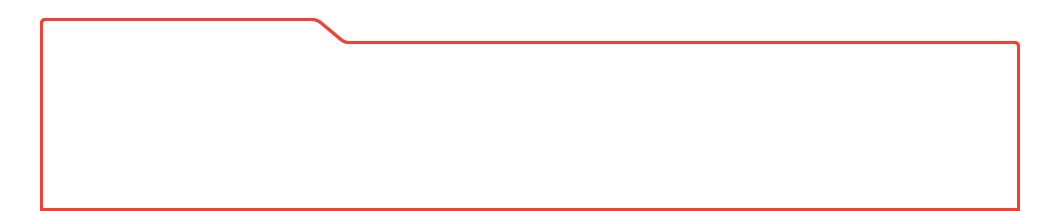
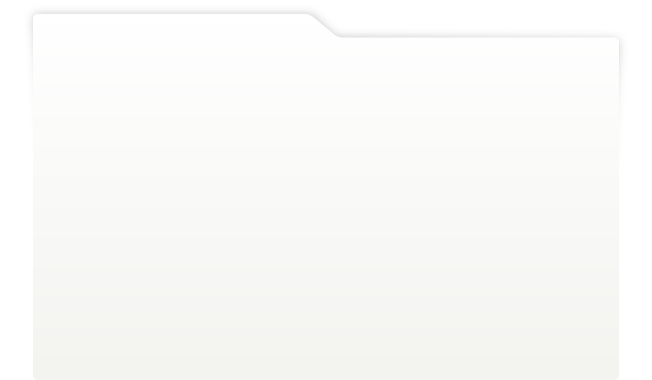
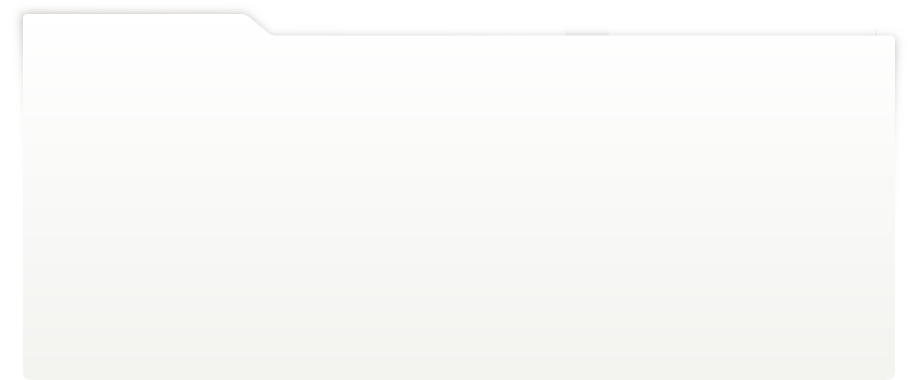
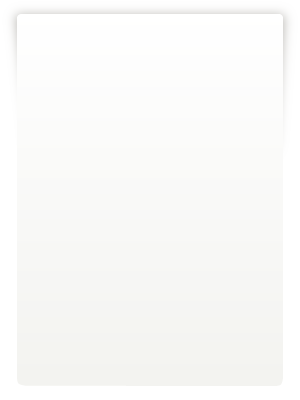
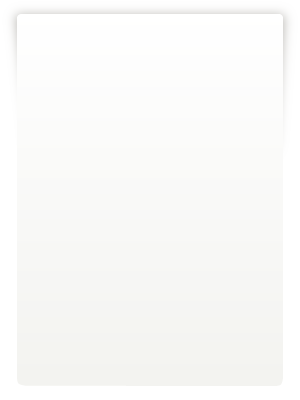
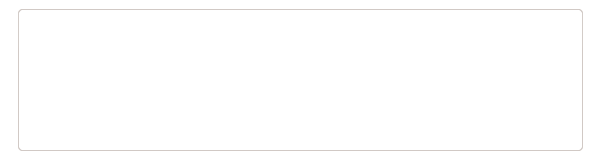
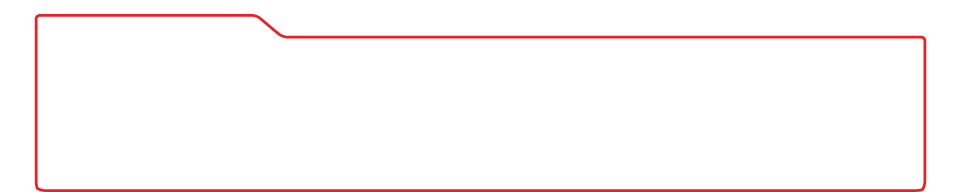
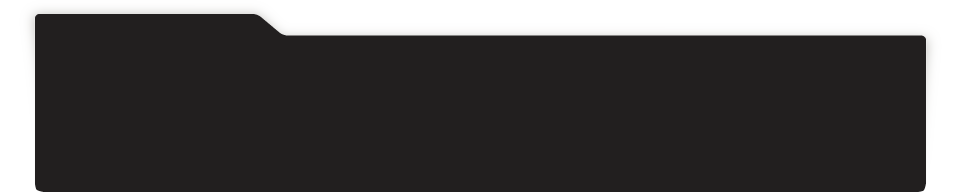
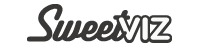
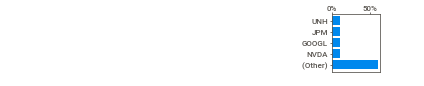
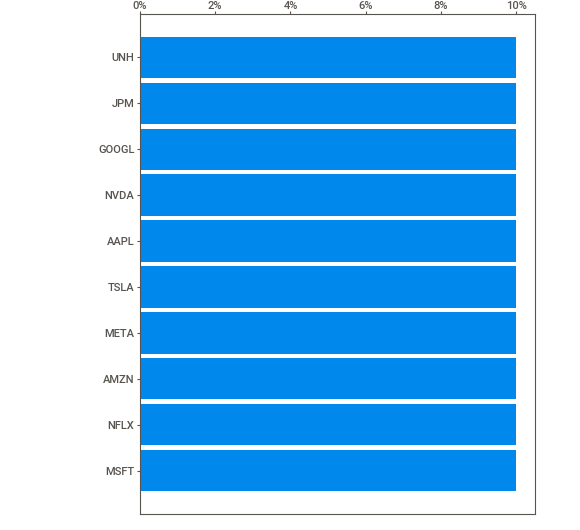
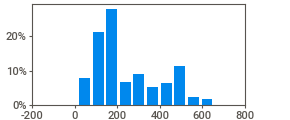
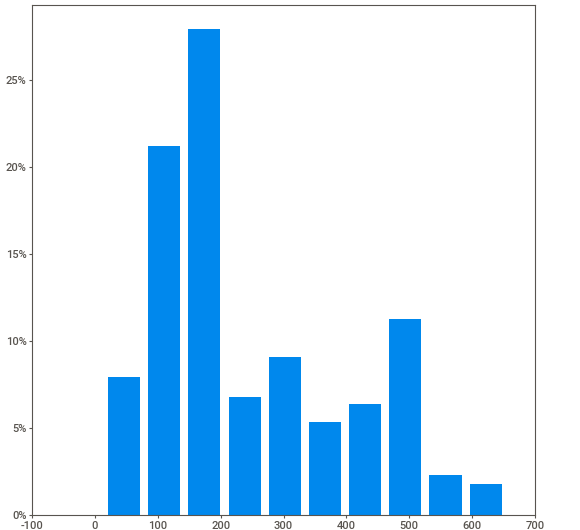
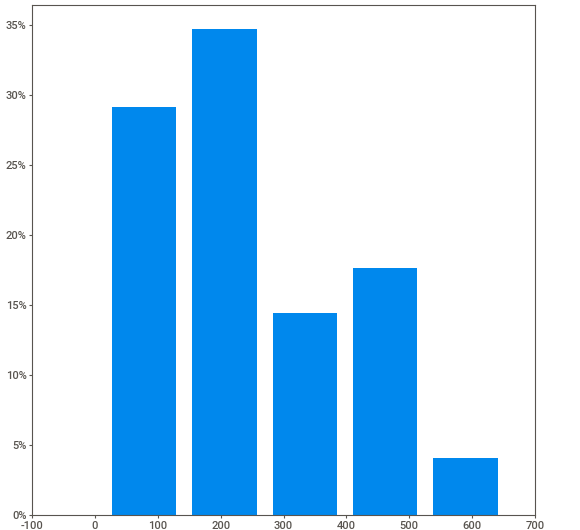
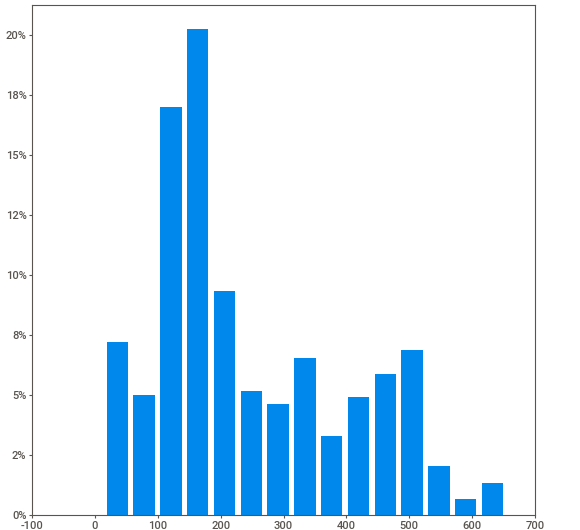
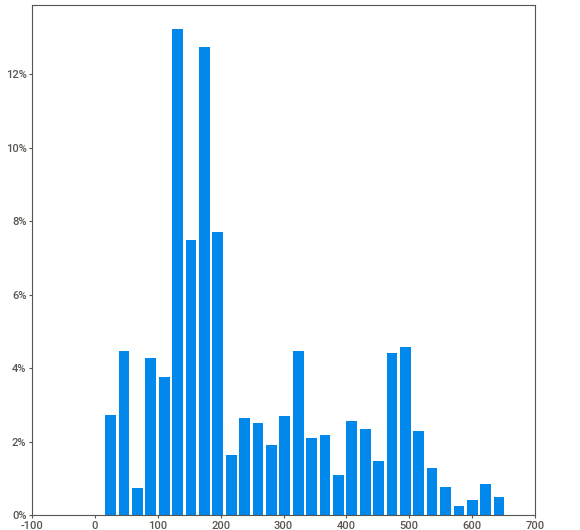
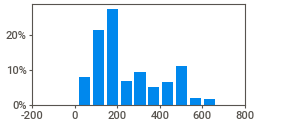
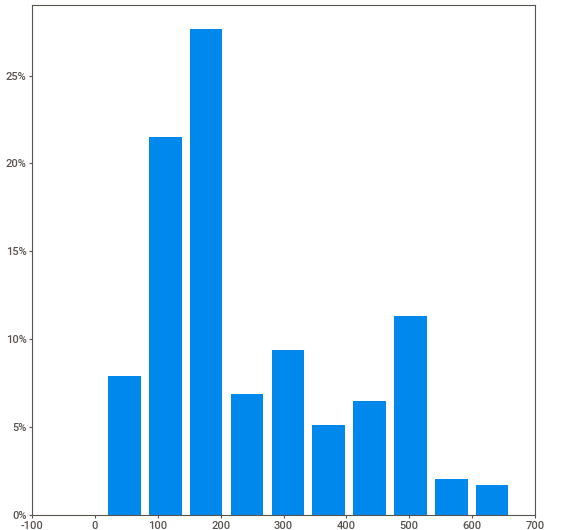
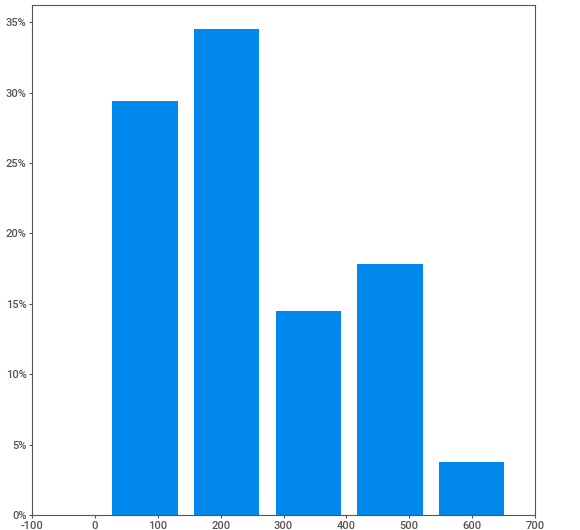
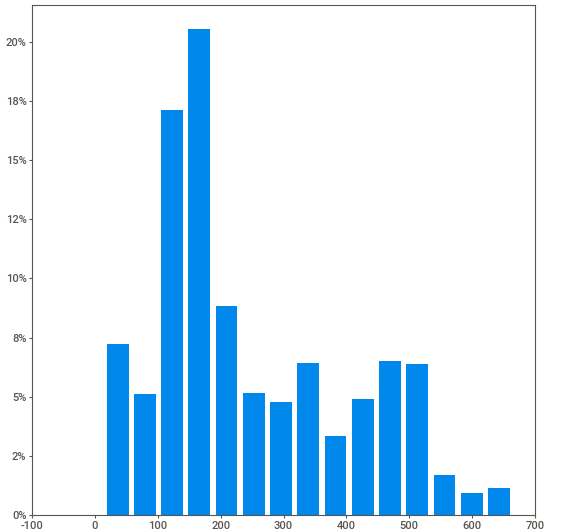
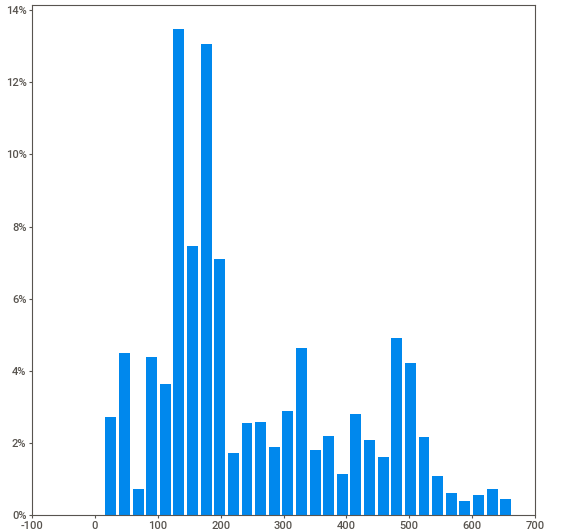
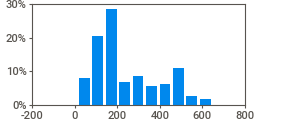
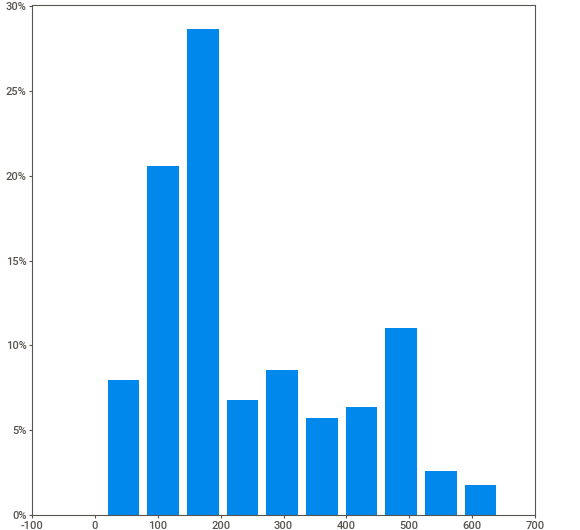
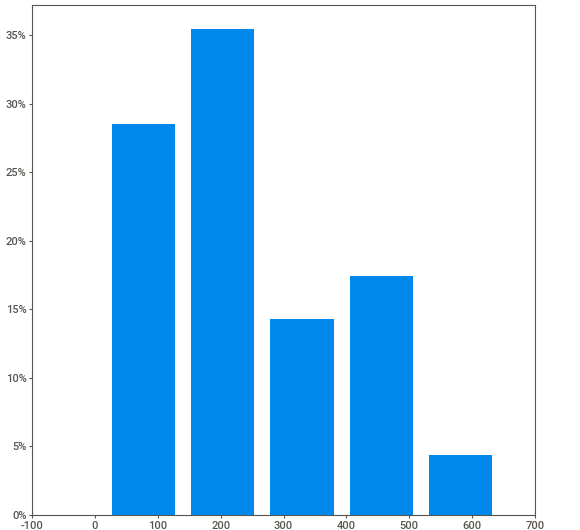
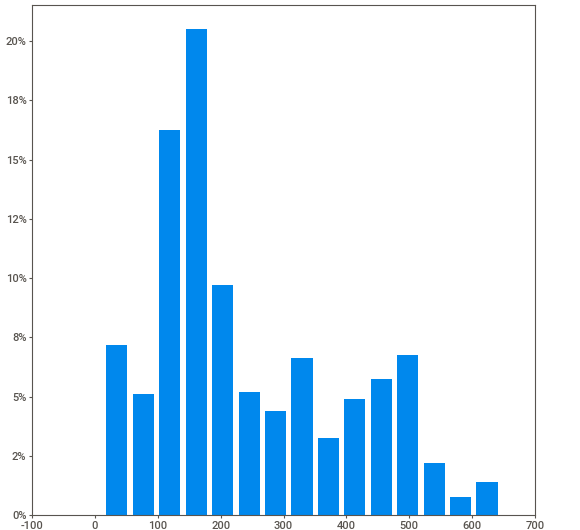
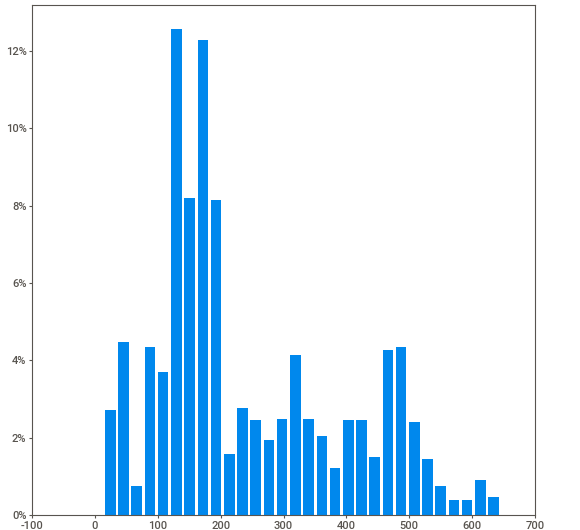
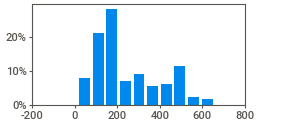
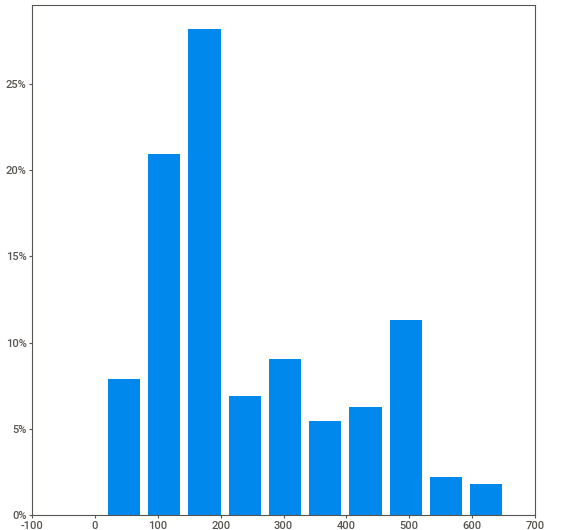
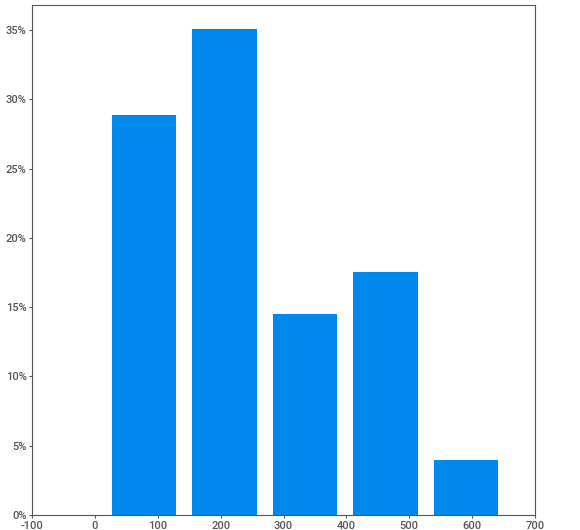
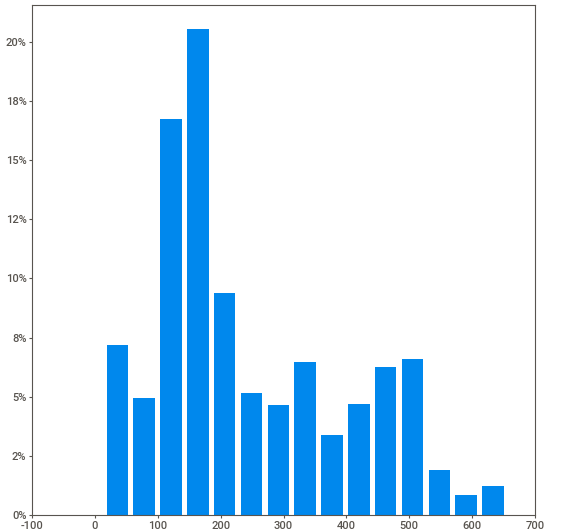
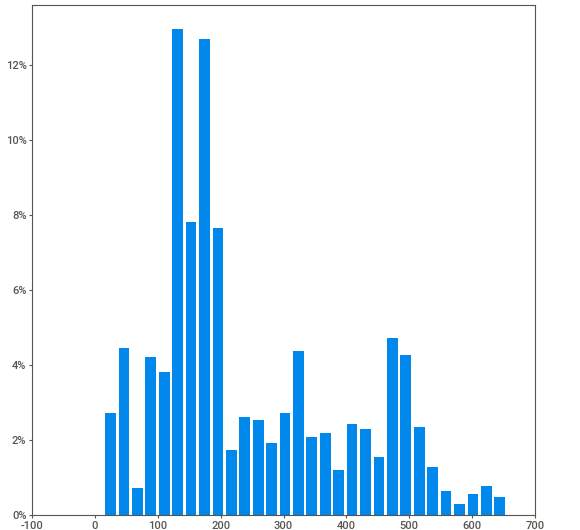
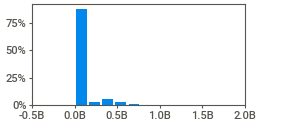
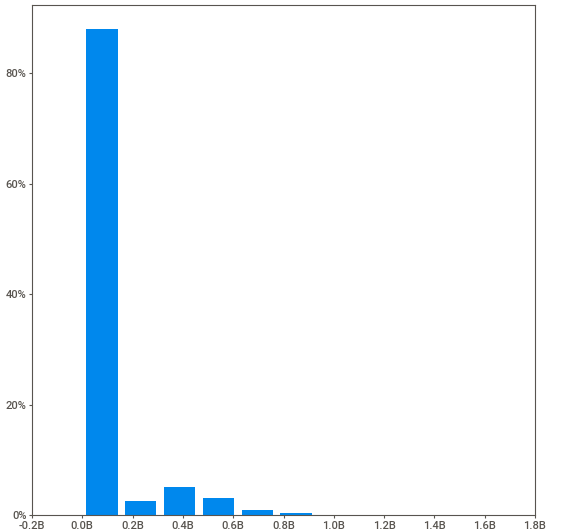
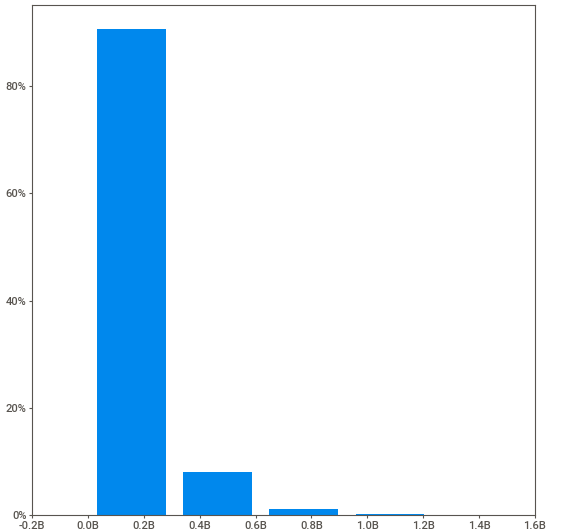
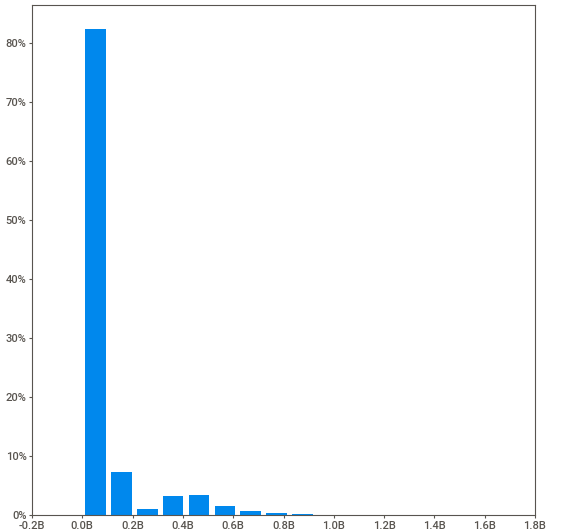
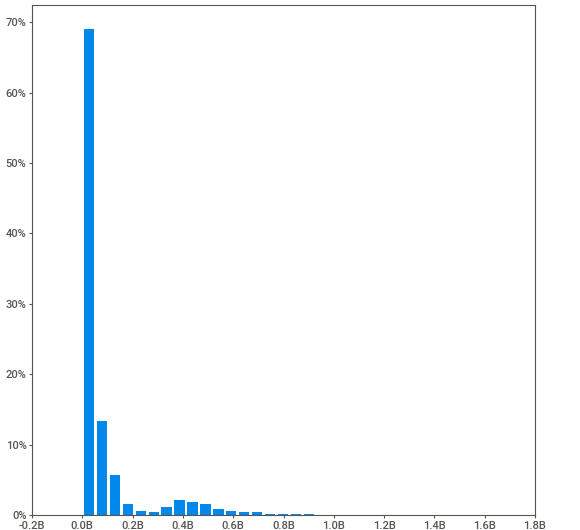
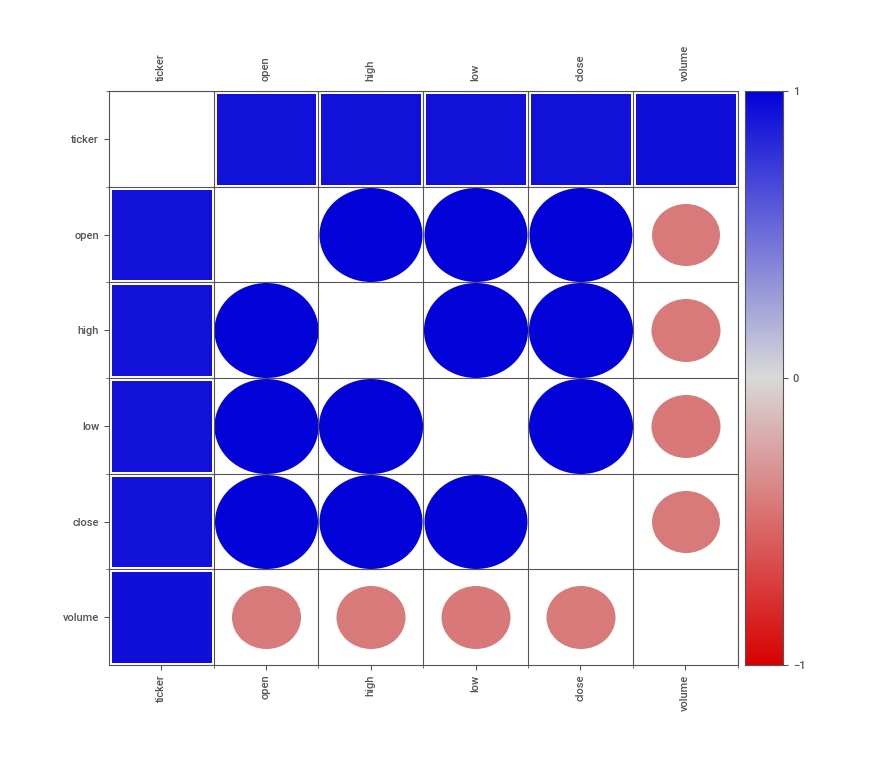
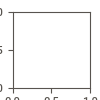

In [8]:
report.show_notebook()

In [26]:
# Print column names to verify the presence of 'date'
print("Column Names:", stock_data_2023_onwards.columns)

# Print the first few rows of the DataFrame to inspect the data
print(stock_data_2023_onwards.head())




Column Names: Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
  ticker        date        open        high         low       close  \
0   TSLA  2023-01-30  178.050003  179.770004  166.500000  166.660004   
1    JPM  2024-05-22  199.000000  200.940002  197.690002  198.309998   
2    JPM  2023-12-15  161.140604  163.314438  160.458808  163.265030   
3   AMZN  2024-04-24  179.940002  180.320007  176.179993  176.589996   
4  GOOGL  2023-11-17  135.844088  135.904017  133.496776  135.154877   

      volume  
0  230878800  
1    9425300  
2   20305900  
3   34185100  
4   37240600  


In [27]:
len(stock_data_2023_onwards)

3630

In [28]:
df_list = [google_df, tesla_df, jpm_df, netflix_df, amazon_df, unh_df, apple_df, microsoft_df, meta_df, nvidia_df]
company_list = ["Google", "Tesla", "JP Morgan", "Netflix", "Amazon", "United Health Group", "Apple", "Microsoft", "Meta", "Nvidia"]

# Line graph for all stocks with time period selections
def line_graph(df, company):
    fig = px.line(df, x='date', y=['open', 'close'], color_discrete_sequence=["green", "red"], title='{} Stock Analysis with Time Period '.format(company)).update_layout(
    xaxis_title="Date", yaxis_title="Price"
)

    fig.update_xaxes(
        rangeselector = dict(
            buttons = list([
                dict(count=7, label='7d', step='day', stepmode='backward'),
                dict(count=14, label='15d', step='day', stepmode='backward'),
                dict(count=30, label='30d', step='day', stepmode='backward'),
                dict(step='all')
            ])
        ))
    fig.show()

for idx, df in enumerate(df_list):
    line_graph(df, company_list[idx])

In [29]:
 # Candlestick graph for all stocks
def candlestick_graph(df, company):
    fig = go.Figure(data = [go.Candlestick(x=df["date"],
                                        open = df["open"],
                                        high = df["high"],
                                        low = df["low"],
                                        close = df["close"]
                                        )
                        ]
                )

    fig.update_layout(title='{} Stock Price Analysis'.format(company), xaxis_rangeslider_visible=False, xaxis_title='date', yaxis_title='price')
    fig.show()

for idx, df in enumerate(df_list):
    candlestick_graph(df, company_list[idx])

In [30]:
 # Box plots to find outliers
def box_plot(df, company):
    fig = px.box(df, y='close', title='{} Stock Closing Price Boxplot'.format(company)).update_layout(
     yaxis_title="price"
)
    fig.show() 


for idx, df in enumerate(df_list):
    box_plot(df, company_list[idx])



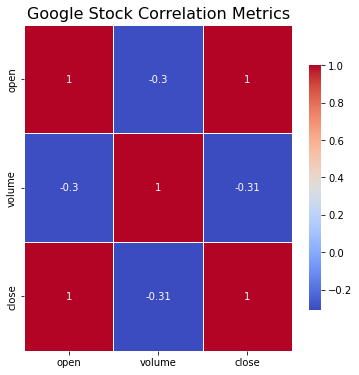

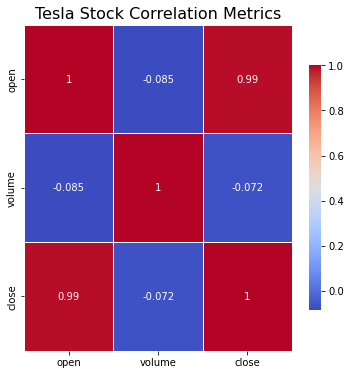

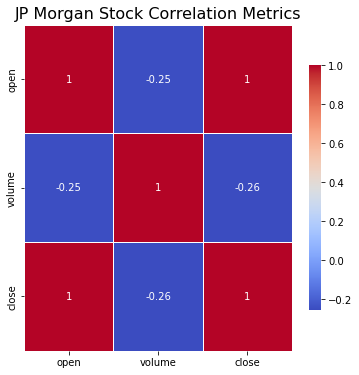

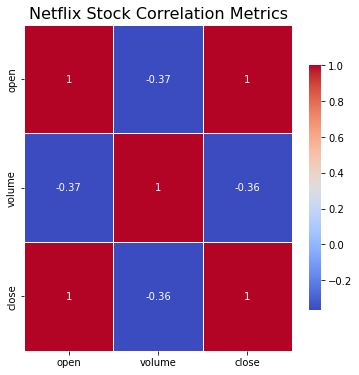

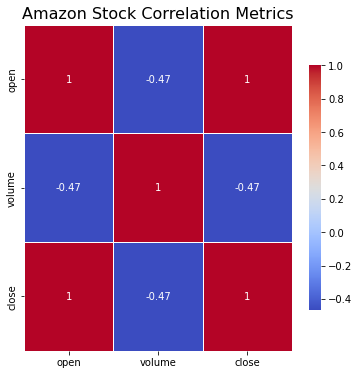

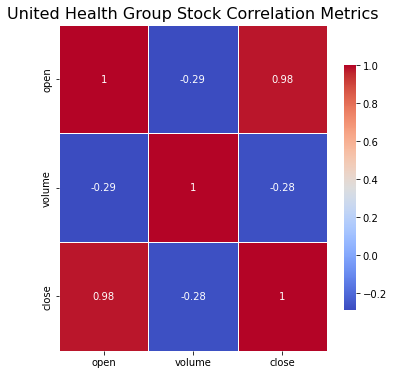

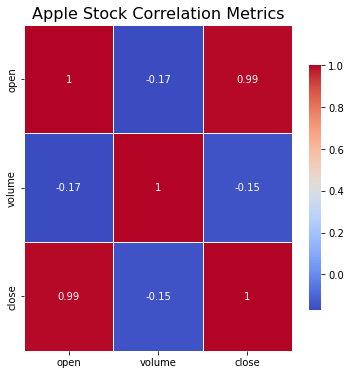

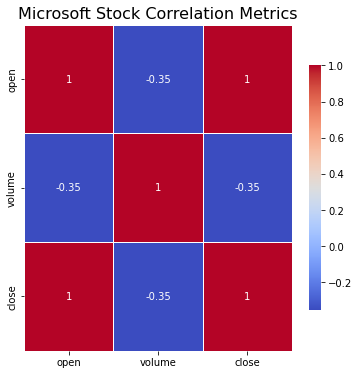

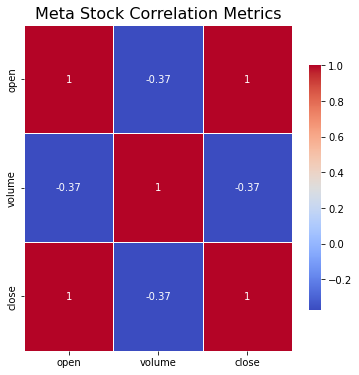

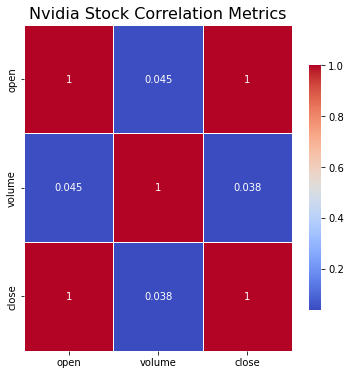

In [31]:
# heatmap

def correlation_stats(df, company):
    # Calculate the correlation matrix
    corr = df[['open', 'volume', 'close']].corr()
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Add a title to the heatmap
    ax.set_title('{} Stock Correlation Metrics'.format(company), fontsize=16)
    
    # Create a heatmap with annotations and a color palette
    sns.heatmap(corr, annot=True, linewidths=0.5, ax=ax, cmap='coolwarm', cbar_kws={'shrink': .75})
    
    # Display the plot
    plt.show()

# Iterate through each DataFrame and generate the correlation stats heatmap
for idx, df in enumerate(df_list):
    correlation_stats(df, company_list[idx])


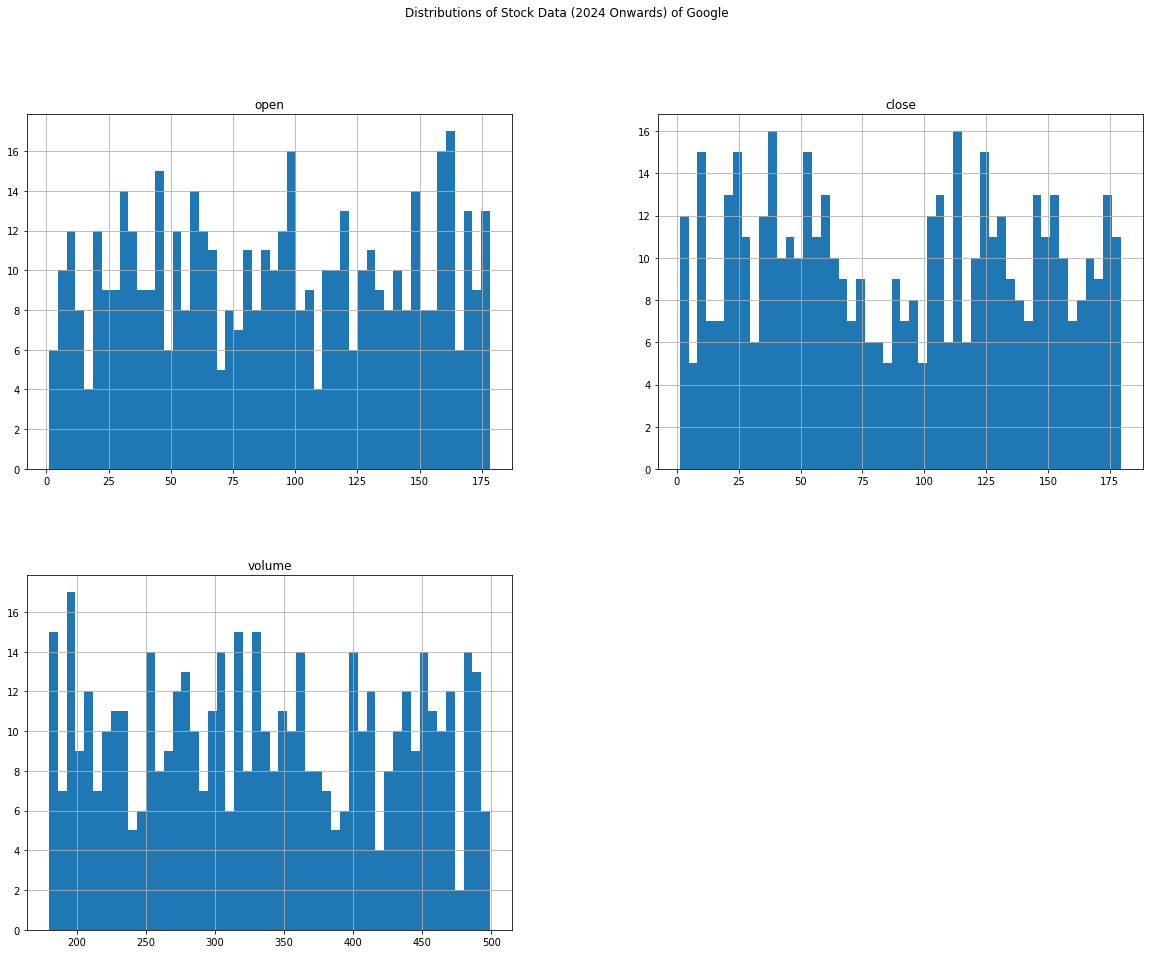

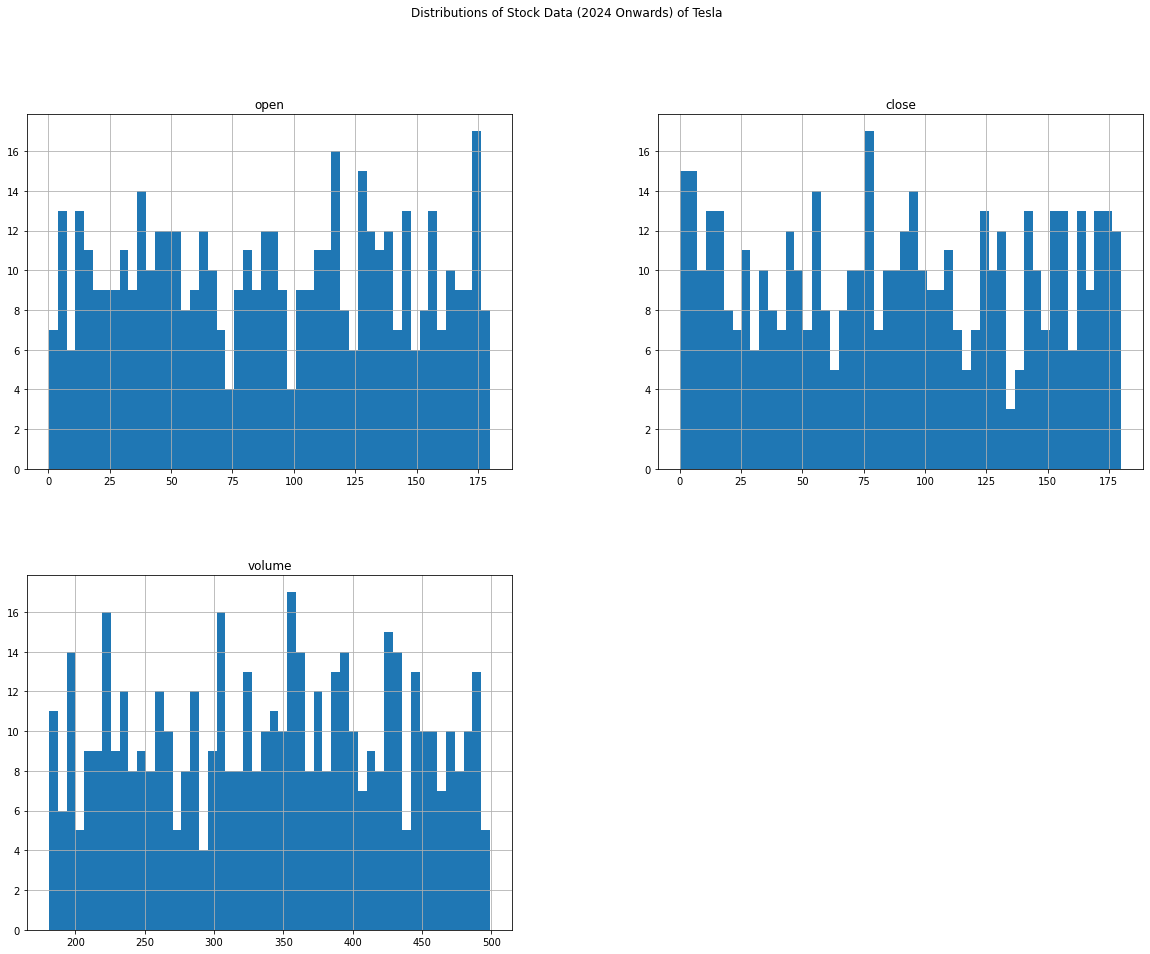

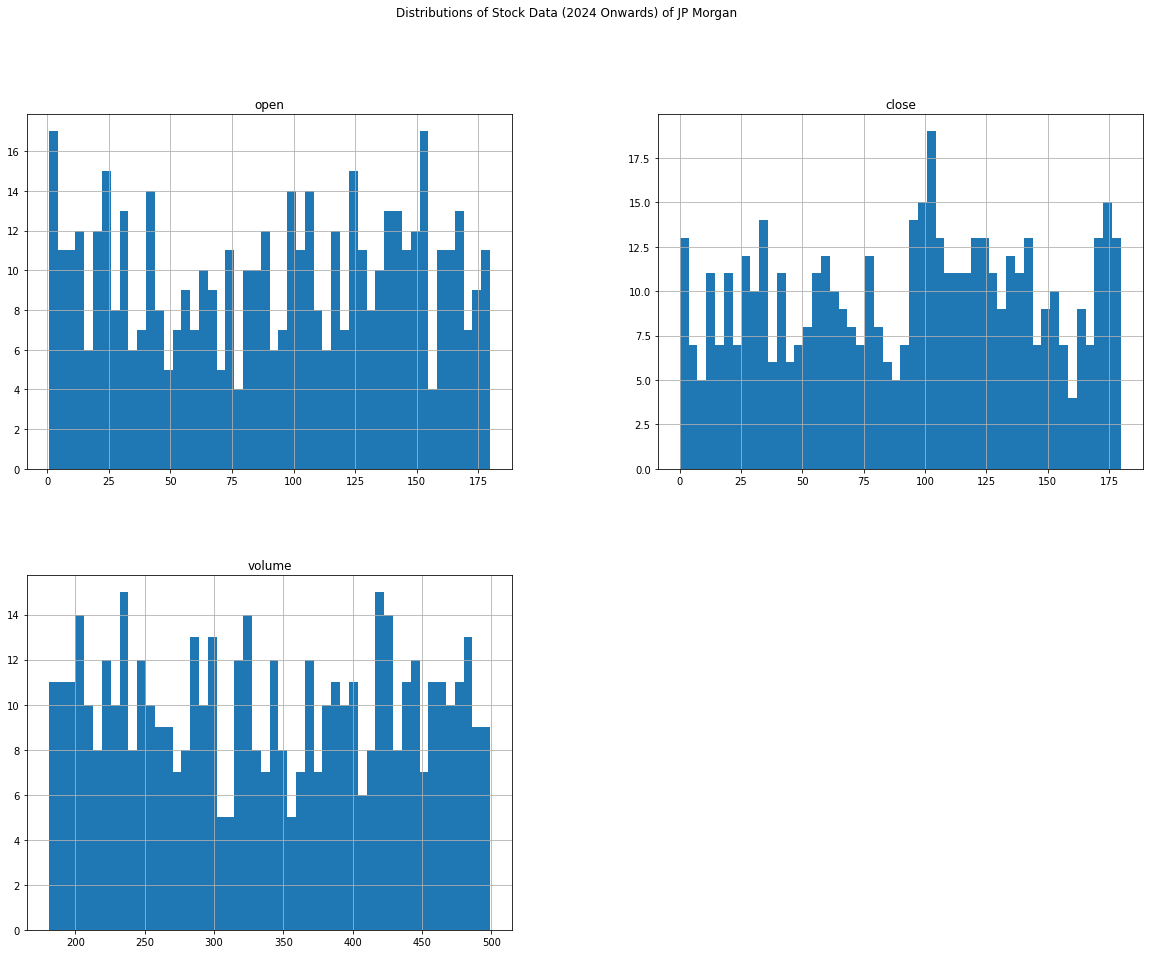

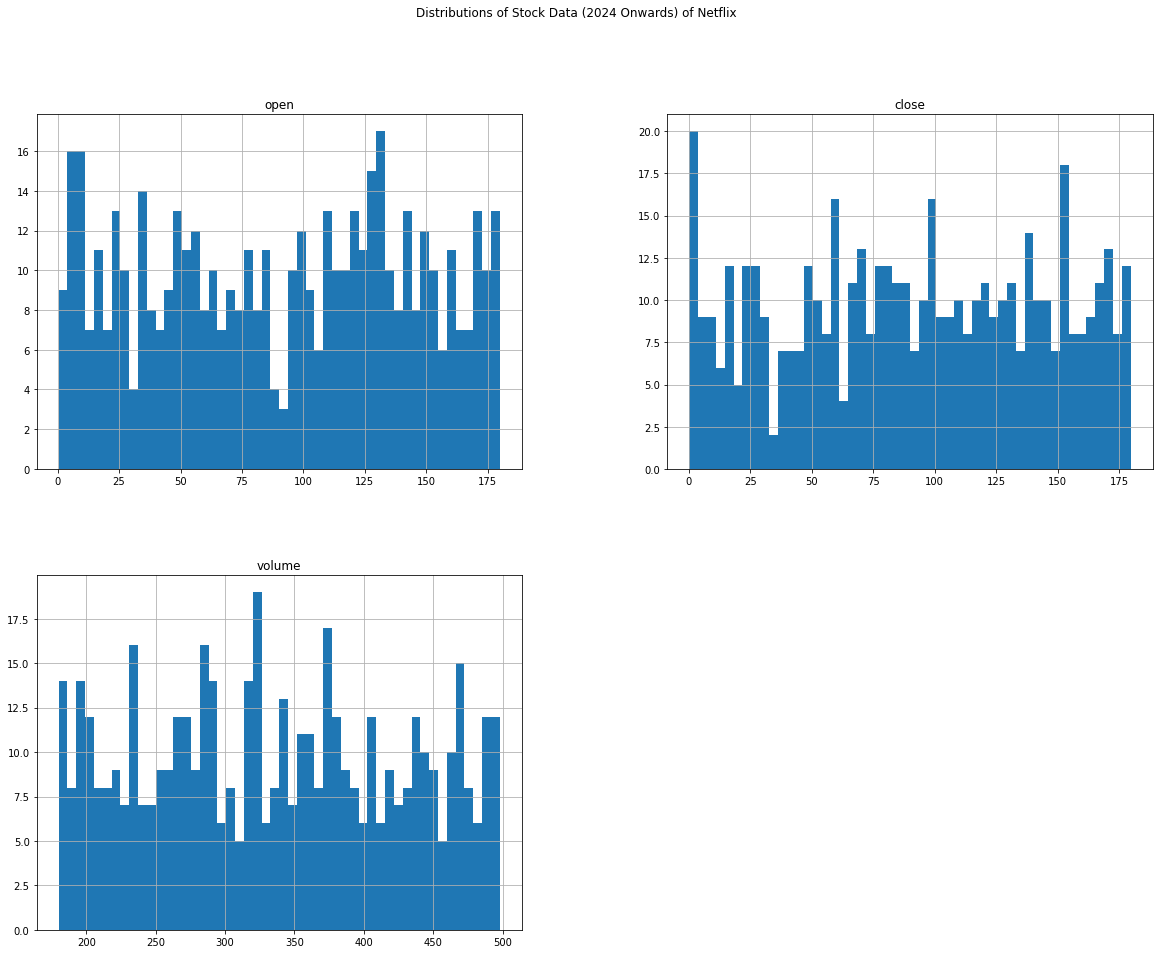

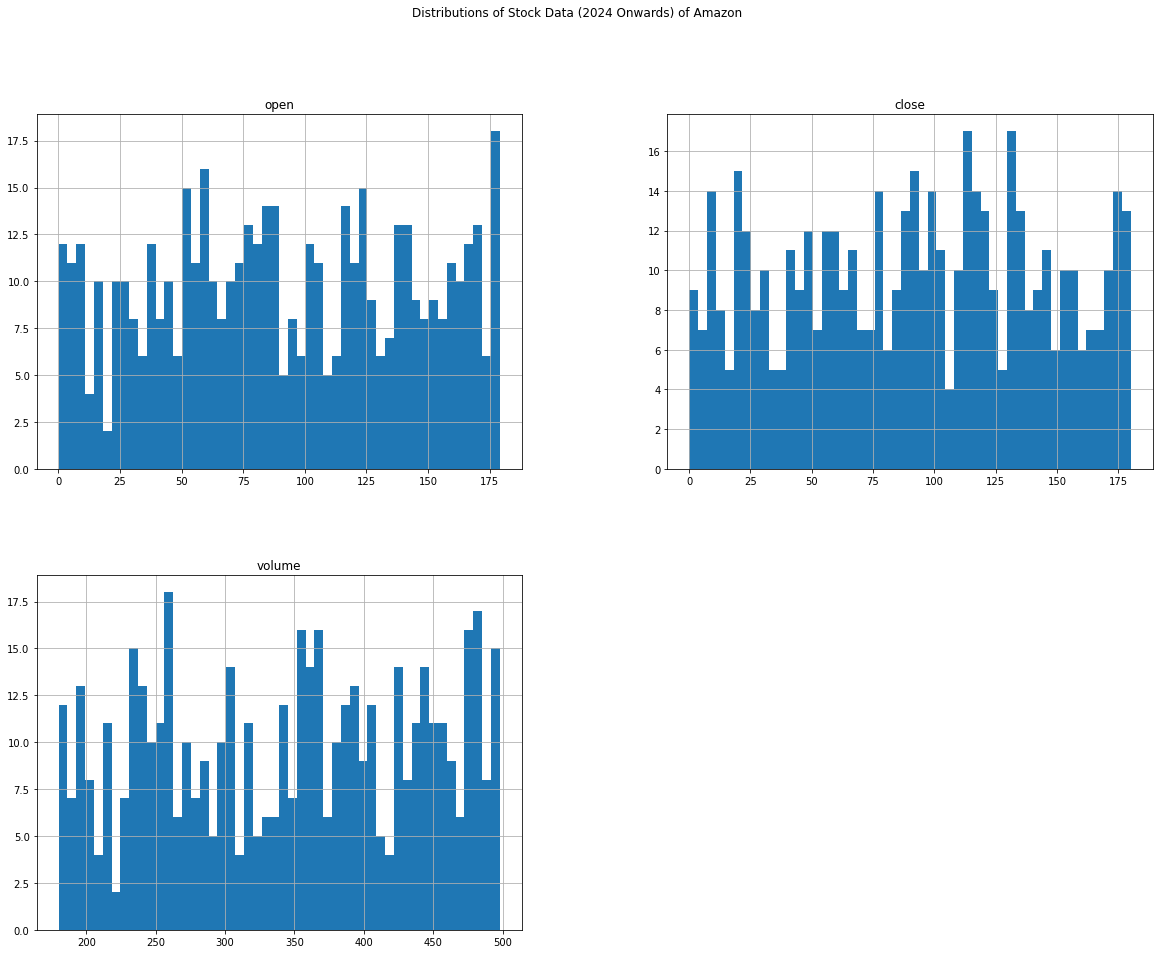

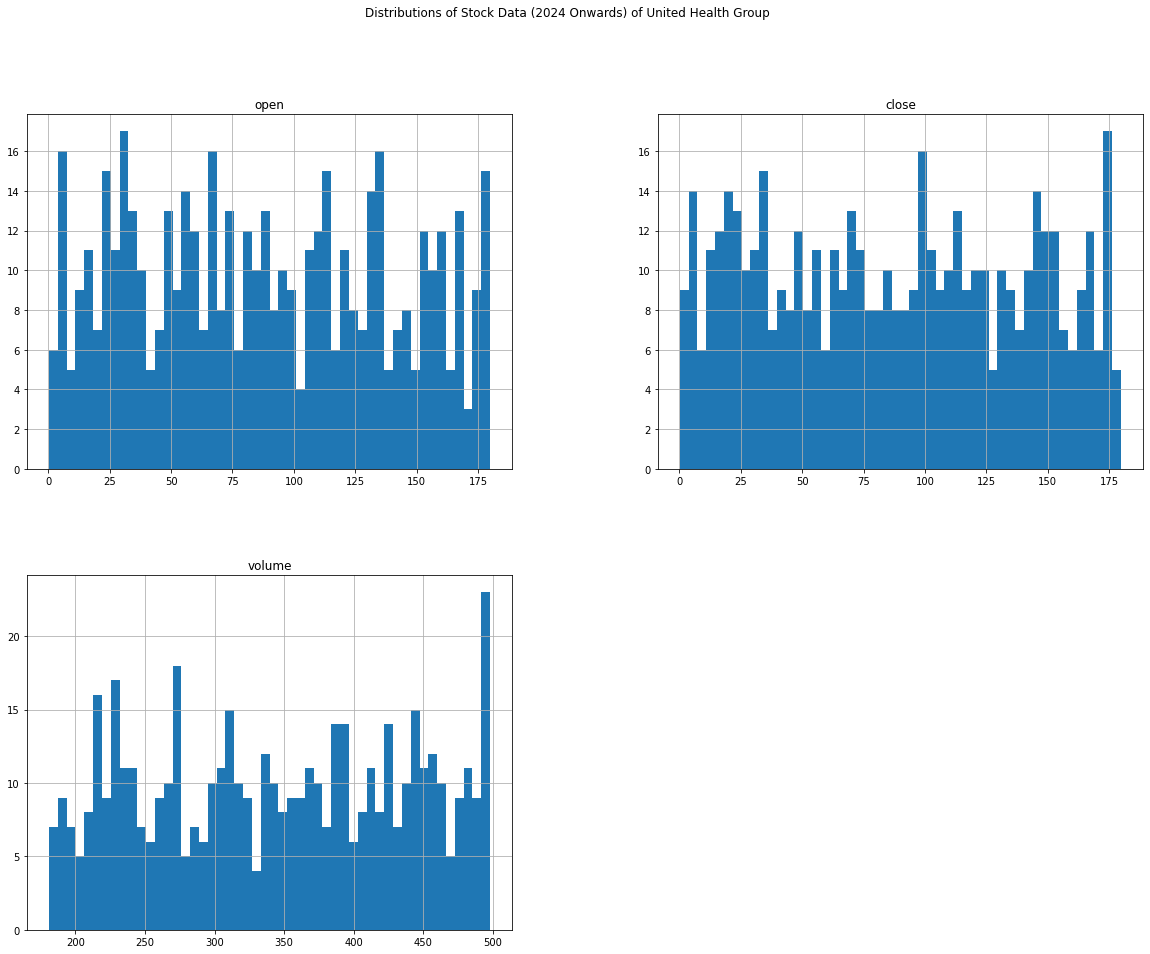

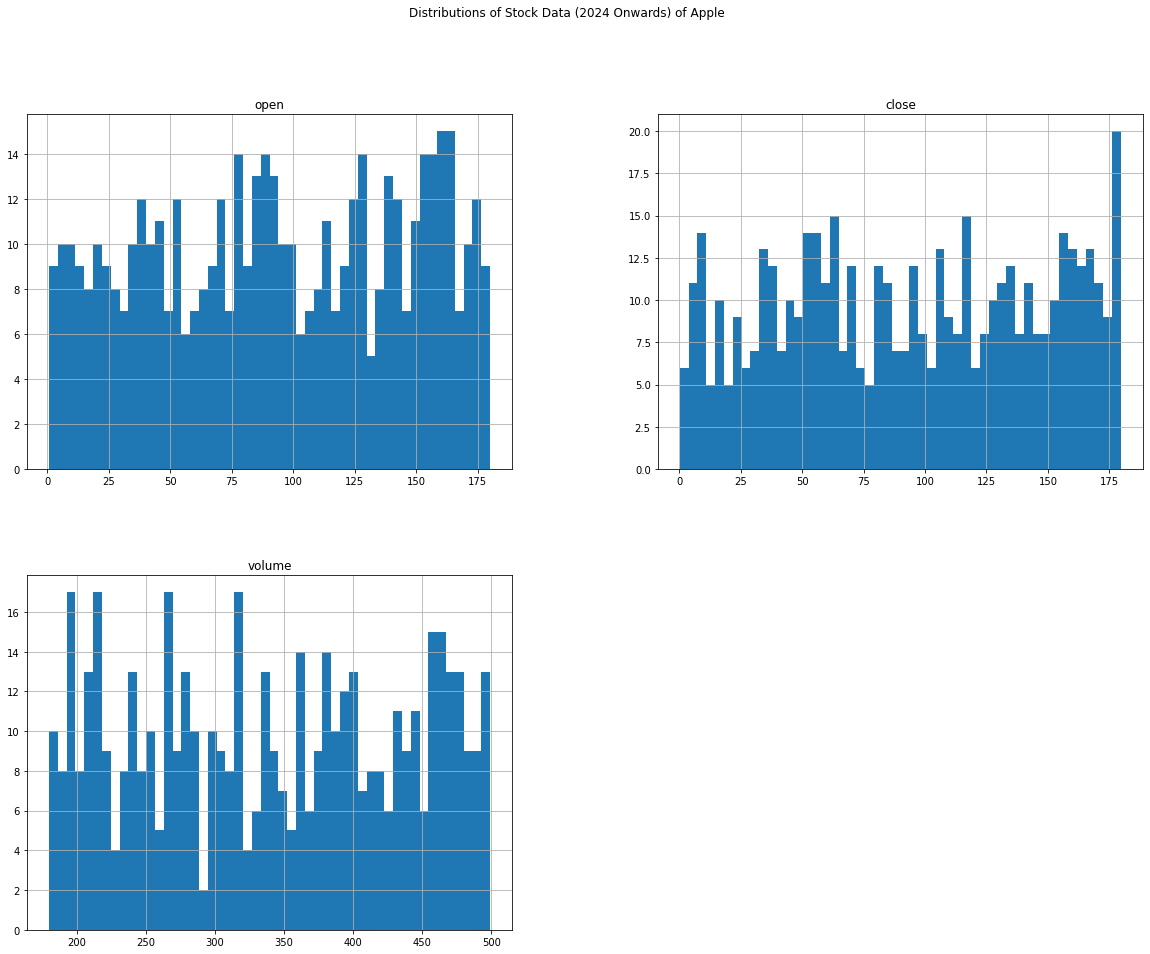

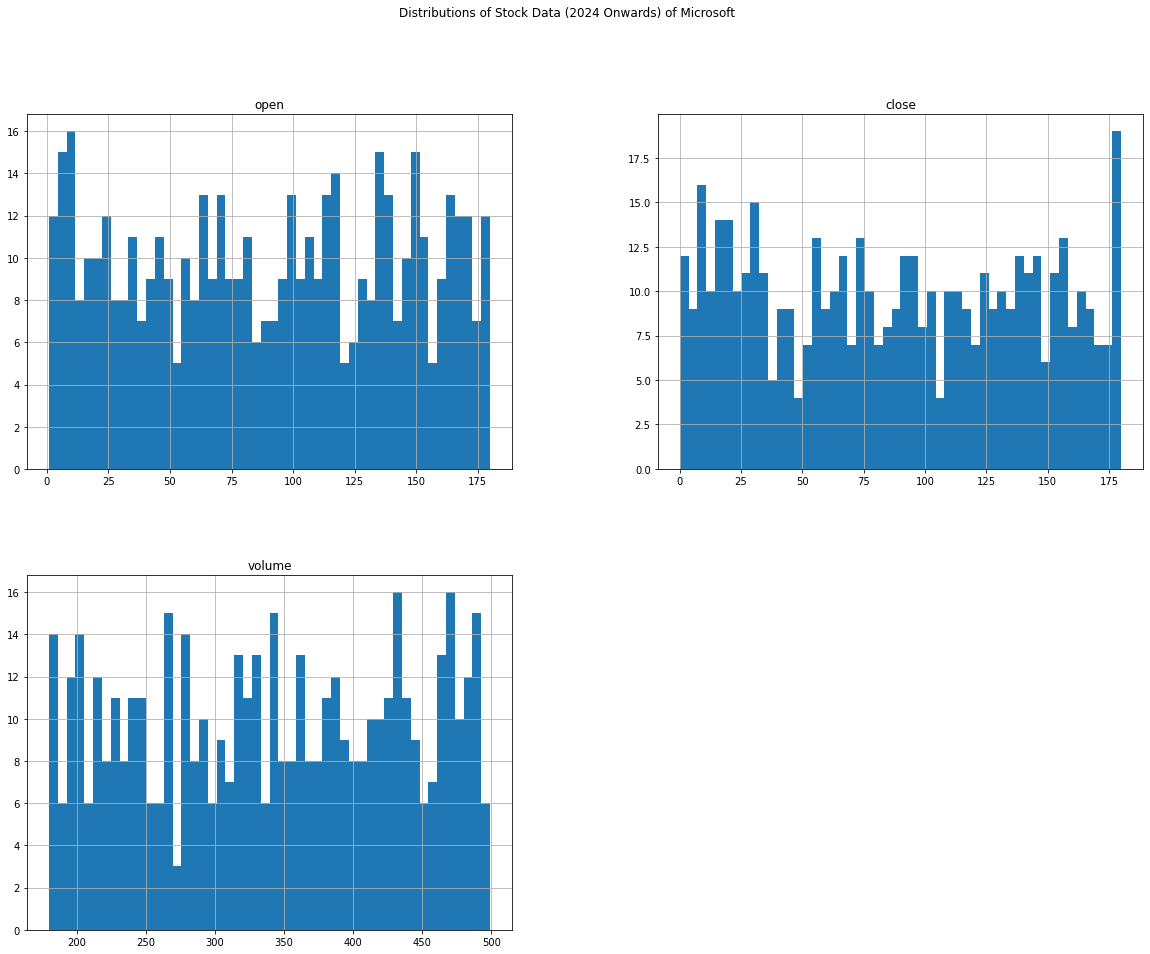

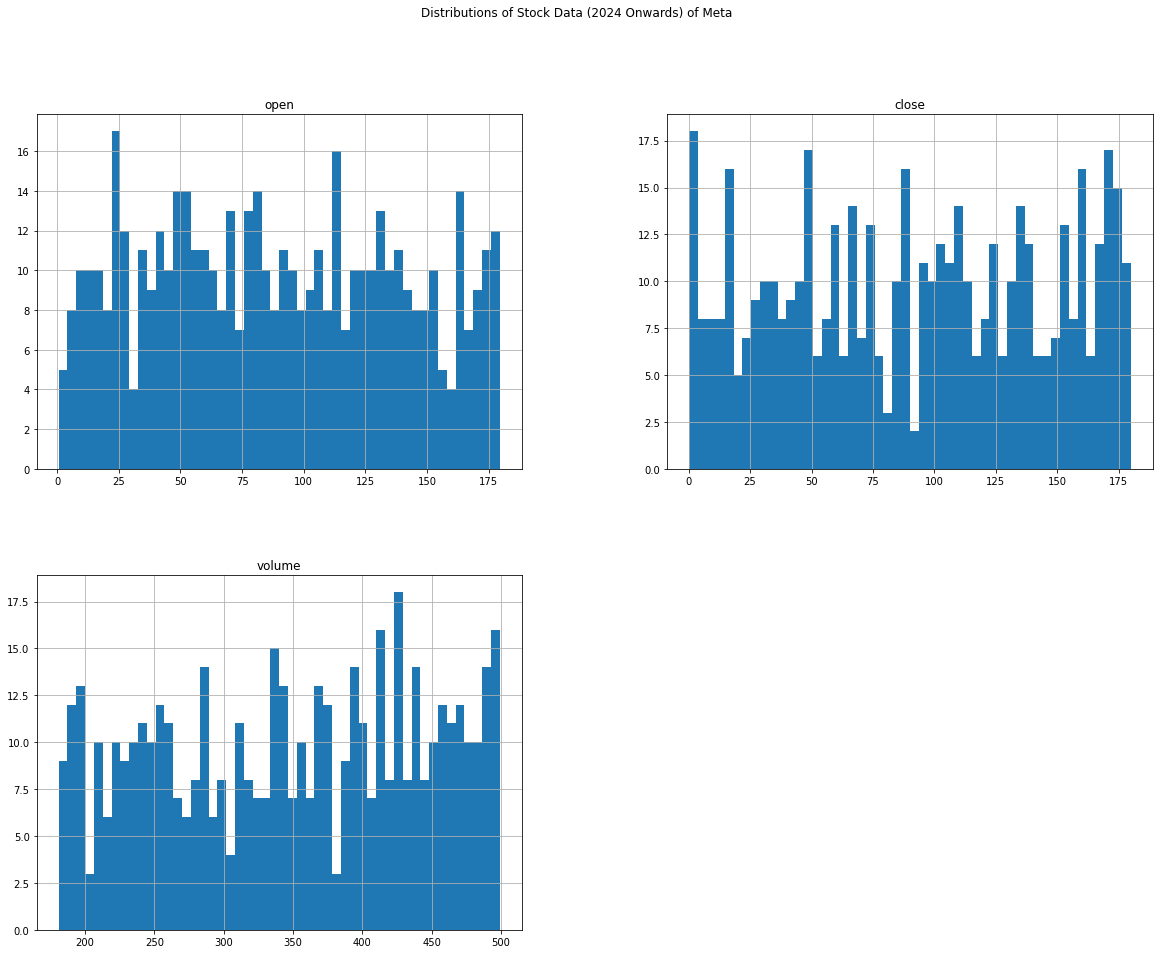

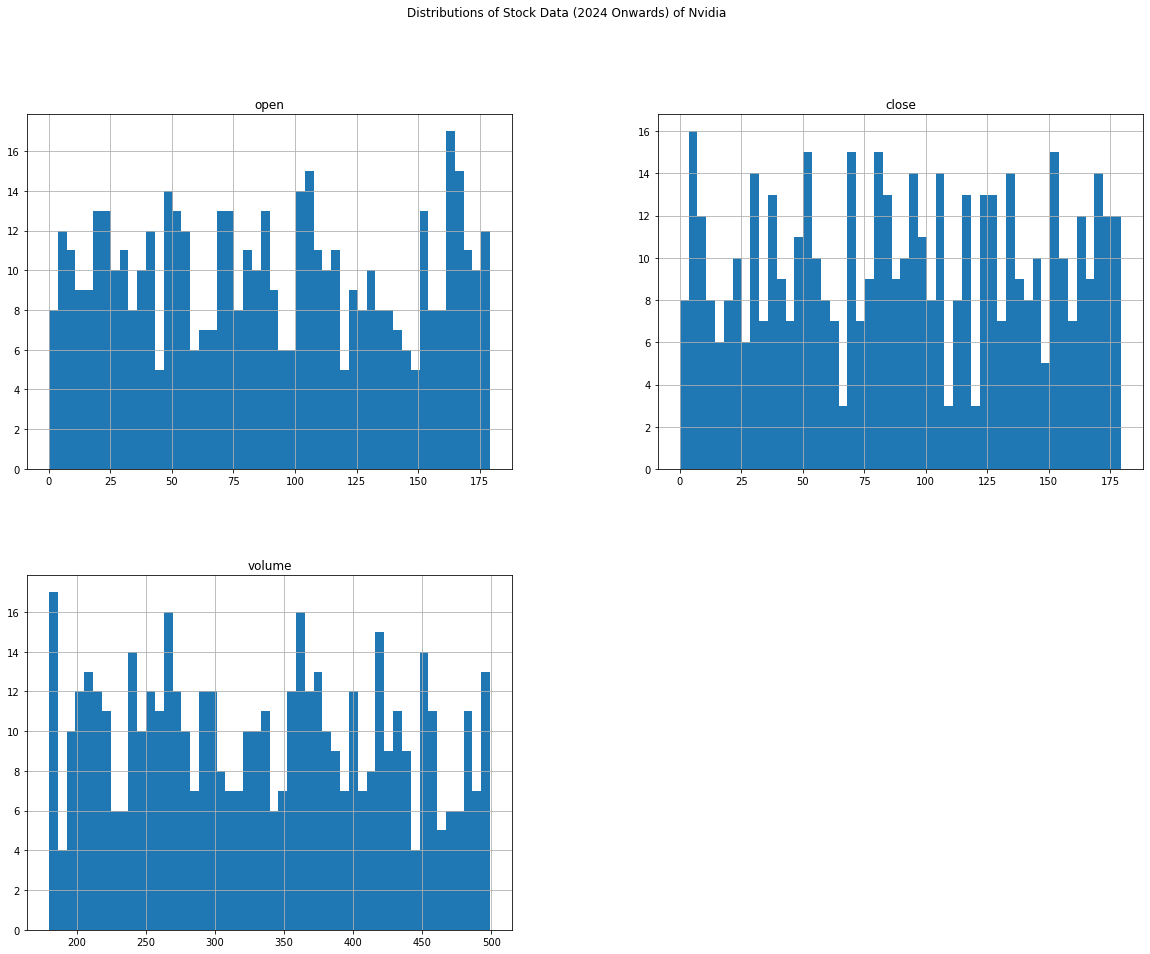

In [32]:
 # Plotting histograms 
def print_histogram(df,company):
    data = {
    'open': np.random.rand(500) * 180,
    'close': np.random.rand(500) * 180,
    'volume': np.random.randint(180, 500, size=500)
    }
    df = pd.DataFrame(data)
    df.hist(bins=50, figsize=(20, 15))
    plt.suptitle(f'Distributions of Stock Data (2024 Onwards) of {company}')
    plt.show()


for idx, df in enumerate(df_list):
    print_histogram(df, company_list[idx])

In [33]:
# now after increasing the dataset , only apple and nvidia seems to have outliers

columns = ['open', 'close', 'high', 'low', 'volume']
# tesla_df,netflix_df,amazon_df,unh_df,microsoft_df,meta_df
outliers_list=[apple_df,nvidia_df]
def remove_outliers_iqr(df, columns):
    df_copy = df.copy()  # Creating copy of the DataFrame to avoid modifying the original
    for column in columns:
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace entries below the lower bound with the lower bound value and above the upper bound with the upper bound value
        df_copy[column] = np.where(df_copy[column] < lower_bound, lower_bound, df_copy[column])
        df_copy[column] = np.where(df_copy[column] > upper_bound, upper_bound, df_copy[column])

#     # Update the DataFrame in the outliers_list with the modified DataFrame
#     index = outliers_list.index(df)
#     outliers_list[index] = df_copy
        df_copy.replace([lower_bound, upper_bound], [lower_bound, upper_bound], inplace=True)
    return df_copy
    

for idx, df in enumerate(outliers_list):
    outliers_list[idx] = remove_outliers_iqr(df, columns)
    
df_list = [apple_df, amazon_df, google_df, jpm_df, meta_df, microsoft_df, netflix_df, nvidia_df, tesla_df, unh_df]
df_list = outliers_list

In [34]:
# df_list = [google_df, tesla_df, jpm_df, netflix_df, amazon_df, unh_df, apple_df, microsoft_df, meta_df, nvidia_df]
#df_list = [apple_df, amazon_df, google_df, jpm_df, meta_df, microsoft_df, netflix_df, outliers_list[-2], tesla_df, unh_df]  # Ensure correct replacement if necessary

company_list = ["Apple", "Nvidia", "JP Morgan", "Netflix", "Amazon", "United Health Group", "Google", "Microsoft", "Meta", "Tesla"]



def box_plot(df, company):
    fig = px.box(df, y='close', title='{} Stock Closing Price Boxplot'.format(company)).update_layout(
     yaxis_title="price"
)
    fig.show() 


for idx, df in enumerate(df_list):
    box_plot(df, company_list[idx])

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\python10\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\python10\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\python10\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\python10\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\python10\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\python10\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\python10\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\python10\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\python10\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\python10\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\python10\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\python10\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelector

Feature Engineering

 In rolling windows, a window of fixed size moves across the time series data, and statistics are computed for each window. This is useful for calculating moving averages, standard deviations, or any other statistic over a fixed period.



daily variation- The difference between the High and Low columns, divided by the Open column. This feature represents the volatility of the index on that day.

daily return -The percentage change in the Close column from the previous day’s Close column. This feature represents the performance of the index on that day.

In [260]:
stock_data_2023_onwards['Daily Variation'] = stock_data_2023_onwards['high'] - stock_data_2023_onwards['low']
stock_data_2023_onwards['Daily Return'] = (stock_data_2023_onwards['close'] - stock_data_2023_onwards['open']) / stock_data_2023_onwards['open']


In [261]:
stock_data_2023_onwards.dropna(inplace=True)


In [262]:
print(stock_data_2023_onwards)

     ticker        date        open        high         low       close  \
0      NVDA  2023-07-25   44.927551   46.169176   44.909555   45.665329   
1      AAPL  2023-12-15  197.278264  198.147151  196.748941  197.318222   
2      AAPL  2023-08-16  176.671509  178.077848  176.043135  176.112961   
3      META  2023-11-02  316.963674  318.482083  308.003180  310.540497   
4     GOOGL  2023-02-17   94.741263   95.450449   93.103144   94.241837   
...     ...         ...         ...         ...         ...         ...   
3625   AMZN  2024-01-10  152.059998  154.419998  151.880005  153.729996   
3626   TSLA  2024-03-08  181.500000  182.729996  174.699997  175.339996   
3627   AAPL  2024-02-26  182.240005  182.759995  180.649994  181.160004   
3628   META  2023-04-20  213.253731  216.520270  212.544492  212.844177   
3629   AAPL  2024-03-20  175.720001  178.669998  175.089996  178.669998   

         volume  Daily Variation  Daily Return  
0     348081000         1.259621      0.016422  
1

In [263]:
stock_data_2023_onwards['high-close']=stock_data_2023_onwards['high']-stock_data_2023_onwards['close']

In [264]:
stock_data_2023_onwards['low-open']=stock_data_2023_onwards['low']-stock_data_2023_onwards['open']

In [265]:
stock_data_2023_onwards['SMA']=stock_data_2023_onwards['close'].rolling(window=1).mean() 

In [266]:
stock_data_2023_onwards.head(20) 

ticker        date        open        high         low       close  \
0    NVDA  2023-07-25   44.927551   46.169176   44.909555   45.665329   
1    AAPL  2023-12-15  197.278264  198.147151  196.748941  197.318222   
2    AAPL  2023-08-16  176.671509  178.077848  176.043135  176.112961   
3    META  2023-11-02  316.963674  318.482083  308.003180  310.540497   
4   GOOGL  2023-02-17   94.741263   95.450449   93.103144   94.241837   
5    META  2024-05-03  445.929993  454.170013  443.850006  451.959991   
6    AMZN  2023-06-06  125.070000  127.400002  125.000000  126.610001   
7    NVDA  2023-06-29   41.545560   41.587547   40.587846   40.809780   
8    NVDA  2024-05-21   93.591310   95.392165   93.172346   95.378166   
9    AAPL  2024-03-18  175.570007  177.710007  173.520004  173.720001   
10   META  2024-01-05  346.622231  353.125341  345.893024  351.576996   
11   META  2023-08-28  287.694748  291.141103  285.497067  289.952362   
12   AAPL  2024-05-03  186.649994  187.000000  182.660004  183.380005   
13   NVDA  2024-03-07   90.150589   92.759376   89.594635   92.661385   
14   NVDA  2023-11-01   40.875133   42.371810   40.860137   42.315823   
15   NFLX  2024-04-05  624.919983  637.909973  622.710022  636.179993   
16   AAPL  2023-04-24  164.123975  164.720795  163.019868  164.452225   
17   MSFT  2024-06-12  435.320007  443.399994  433.250000  441.059998   
18  GOOGL  2023-05-11  115.267706  117.784814  114.278843  116.436363   
19    JPM  2023-12-22  165.508042  166.229357  165.241249  165.409225   

       volume  Daily Variation  Daily Return  high-close  low-open         SMA  
0   348081000         1.259621      0.016422    0.503847 -0.017996   45.665329  
1   128256700         1.398210      0.000203    0.828929 -0.529323  197.318222  
2    46964900         2.034713     -0.003162    1.964887 -0.628374  176.112961  
3    21631800        10.478902     -0.020265    7.941586 -8.960494  310.540497  
4    34284100         2.347304     -0.005271    1.208612 -1.638119   94.241837  
5    16489100        10.320007      0.013522    2.210022 -2.079987  451.959991  
6    45695200         2.400002      0.012313    0.790001 -0.070000  126.610001  
7   380514000         0.999701     -0.017710    0.777767 -0.957713   40.809780  
8   328946000         2.219819      0.019092    0.013999 -0.418964   95.378166  
9    75604200         4.190002     -0.010537    3.990005 -2.050003  173.720001  
10   13920700         7.232317      0.014294    1.548345 -0.729207  351.576996  
11   14239300         5.644036      0.007847    1.188741 -2.197680  289.952362  
12  163224100         4.339996     -0.017519    3.619995 -3.989990  183.380005  
13  608119000         3.164741      0.027851    0.097992 -0.555954   92.661385  
14  437593000         1.511673      0.035246    0.055988 -0.014996   42.315823  
15    3372800        15.199951      0.018018    1.729980 -2.209961  636.179993  
16   41949600         1.700928      0.002000    0.268571 -1.104107  164.452225  
17   22174600        10.149994      0.013186    2.339996 -2.070007  441.059998  
18   78900000         3.505971      0.010139    1.348451 -0.988863  116.436363  
19    6574900         0.988108     -0.000597    0.820131 -0.266793  165.409225

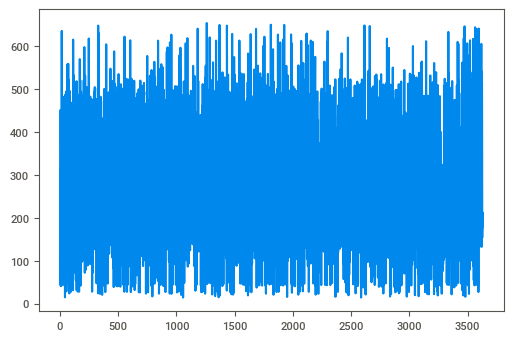

In [267]:
plt.plot(stock_data_2023_onwards['SMA'])


In [268]:
# stock_data_2023_onwards['SMA']=stock_data_2023_onwards['close'].rolling(window=20,center= True).mean() 

The SMA is the average of the closing prices over a specified number of periods. For example, a 20-day SMA is calculated as the sum of the closing prices for the past 20 days divided by 20.

In [269]:
stock_data_2023_onwards['EMA'] = stock_data_2023_onwards['close'].ewm(span=20, adjust=False).mean()


In [270]:
def rsi(data):
    delta = data.diff()
    delta = delta[1:]  # Get rid of the first row which is NaN
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    ema_up = up.ewm(com=14, min_periods=14, adjust=False).mean()
    ema_down = down.abs().ewm(com=14, min_periods=14, adjust=False).mean()
    rs = ema_up / ema_down
    rsi = 100 - (1 / (1 + rs))
    return rsi


# Assuming 'close' is already available in your DataFrame
stock_data_2023_onwards['RSI'] = rsi(stock_data_2023_onwards['close'])
print(stock_data_2023_onwards)


     ticker        date        open        high         low       close  \
0      NVDA  2023-07-25   44.927551   46.169176   44.909555   45.665329   
1      AAPL  2023-12-15  197.278264  198.147151  196.748941  197.318222   
2      AAPL  2023-08-16  176.671509  178.077848  176.043135  176.112961   
3      META  2023-11-02  316.963674  318.482083  308.003180  310.540497   
4     GOOGL  2023-02-17   94.741263   95.450449   93.103144   94.241837   
...     ...         ...         ...         ...         ...         ...   
3625   AMZN  2024-01-10  152.059998  154.419998  151.880005  153.729996   
3626   TSLA  2024-03-08  181.500000  182.729996  174.699997  175.339996   
3627   AAPL  2024-02-26  182.240005  182.759995  180.649994  181.160004   
3628   META  2023-04-20  213.253731  216.520270  212.544492  212.844177   
3629   AAPL  2024-03-20  175.720001  178.669998  175.089996  178.669998   

         volume  Daily Variation  Daily Return  high-close  low-open  \
0     348081000         1.2

In [271]:
# Drop rows with null or zero RSI values
stock_data_2023_onwards.dropna(subset=['RSI'], inplace=True)
stock_data_2023_onwards = stock_data_2023_onwards[stock_data_2023_onwards['RSI'] != 0]

print(stock_data_2023_onwards)



     ticker        date        open        high         low       close  \
14     NVDA  2023-11-01   40.875133   42.371810   40.860137   42.315823   
15     NFLX  2024-04-05  624.919983  637.909973  622.710022  636.179993   
16     AAPL  2023-04-24  164.123975  164.720795  163.019868  164.452225   
17     MSFT  2024-06-12  435.320007  443.399994  433.250000  441.059998   
18    GOOGL  2023-05-11  115.267706  117.784814  114.278843  116.436363   
...     ...         ...         ...         ...         ...         ...   
3625   AMZN  2024-01-10  152.059998  154.419998  151.880005  153.729996   
3626   TSLA  2024-03-08  181.500000  182.729996  174.699997  175.339996   
3627   AAPL  2024-02-26  182.240005  182.759995  180.649994  181.160004   
3628   META  2023-04-20  213.253731  216.520270  212.544492  212.844177   
3629   AAPL  2024-03-20  175.720001  178.669998  175.089996  178.669998   

         volume  Daily Variation  Daily Return  high-close  low-open  \
14    437593000         1.5

Moving Average Convergence Divergence MACD

In [272]:
stock_data_2023_onwards['EMA_fast'] = stock_data_2023_onwards['close'].ewm(span=12, adjust=False).mean()      #fast period=12
stock_data_2023_onwards['EMA_slow'] = stock_data_2023_onwards['close'].ewm(span=26, adjust=False).mean()      #slow period=26
stock_data_2023_onwards['MACD'] = stock_data_2023_onwards['EMA_fast'] - stock_data_2023_onwards['EMA_slow']

# Check for missing values
print(stock_data_2023_onwards.isnull().sum())

# Fill or interpolate missing values if necessary
stock_data_2023_onwards['close'].fillna(method='ffill', inplace=True)  # Forward fill

zero_count = (stock_data_2023_onwards['MACD'] == 0).sum()
print(f'Number of zero values in column MACD: {zero_count}')


ticker             0
date               0
open               0
high               0
low                0
close              0
volume             0
Daily Variation    0
Daily Return       0
high-close         0
low-open           0
SMA                0
EMA                0
RSI                0
EMA_fast           0
EMA_slow           0
MACD               0
dtype: int64
Number of zero values in column MACD: 1


C:\Users\shaik\AppData\Local\Temp/ipykernel_7480/3138058050.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\shaik\AppData\Local\Temp/ipykernel_7480/3138058050.py:9: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [273]:
stock_data_2023_onwards.head(20) 

ticker        date        open        high         low       close  \
14   NVDA  2023-11-01   40.875133   42.371810   40.860137   42.315823   
15   NFLX  2024-04-05  624.919983  637.909973  622.710022  636.179993   
16   AAPL  2023-04-24  164.123975  164.720795  163.019868  164.452225   
17   MSFT  2024-06-12  435.320007  443.399994  433.250000  441.059998   
18  GOOGL  2023-05-11  115.267706  117.784814  114.278843  116.436363   
19    JPM  2023-12-22  165.508042  166.229357  165.241249  165.409225   
20   TSLA  2024-04-15  170.240005  170.690002  161.380005  161.479996   
21   AAPL  2023-09-27  172.173180  172.592091  168.612428  169.988846   
22    UNH  2023-06-28  476.580048  476.738266  468.689145  469.153900   
23   NFLX  2023-04-27  324.299988  327.450012  317.440002  325.850006   
24   TSLA  2024-05-07  182.399994  183.259995  177.399994  177.809998   
25   META  2023-04-24  213.453509  213.693260  210.486671  212.564453   
26   TSLA  2023-02-06  193.009995  198.169998  189.919998  194.759995   
27    JPM  2023-04-10  123.272711  124.919070  122.960974  124.587852   
28   NFLX  2023-05-25  359.609985  367.450012  357.420013  359.000000   
29   AMZN  2023-04-13   98.949997  102.570000   98.709999  102.400002   
30   AMZN  2023-12-18  150.559998  154.850006  150.050003  154.070007   
31   TSLA  2023-07-24  255.850006  269.850006  254.119995  269.059998   
32   NFLX  2023-09-21  386.500000  395.899994  383.420013  384.149994   
33    UNH  2023-09-18  484.838191  485.165765  480.063370  482.505371   

       volume  Daily Variation  Daily Return  high-close  low-open  \
14  437593000         1.511673      0.035246    0.055988 -0.014996   
15    3372800        15.199951      0.018018    1.729980 -2.209961   
16   41949600         1.700928      0.002000    0.268571 -1.104107   
17   22174600        10.149994      0.013186    2.339996 -2.070007   
18   78900000         3.505971      0.010139    1.348451 -0.988863   
19    6574900         0.988108     -0.000597    0.820131 -0.266793   
20  100245300         9.309998     -0.051457    9.210007 -8.860001   
21   66921800         3.979662     -0.012687    2.603245 -3.560751   
22    3670100         8.049120     -0.015582    7.584366 -7.890903   
23    5618800        10.010010      0.004780    1.600006 -6.859985   
24   75045900         5.860001     -0.025164    5.449997 -5.000000   
25   15750900         3.206589     -0.004165    1.128807 -2.966838   
26  186188100         8.250000      0.009067    3.410004 -3.089996   
27    9477300         1.958096      0.010669    0.331218 -0.311737   
28    6263100        10.029999     -0.001696    8.450012 -2.189972   
29   67925100         3.860001      0.034866    0.169998 -0.239998   
30   62512800         4.800003      0.023313    0.779999 -0.509995   
31  136508500        15.730011      0.051632    0.790009 -1.730011   
32    5547900        12.479980     -0.006080   11.750000 -3.079987   
33    1997500         5.102395     -0.004812    2.660394 -4.774821   

           SMA         EMA        RSI    EMA_fast    EMA_slow       MACD  
14   42.315823  143.589722  99.689063   42.315823   42.315823   0.000000  
15  636.179993  190.503081  99.762838  133.679541   86.305761  47.373780  
16  164.452225  188.022047  99.634677  138.413800   92.094388  46.319412  
17  441.059998  212.120899  99.669555  184.974754  117.943692  67.031061  
18  116.436363  203.008086  99.597791  174.430386  117.832038  56.598347  
19  165.409225  199.427243  99.604640  173.042515  121.356275  51.686240  
20  161.479996  195.813219  99.603756  171.263666  124.328402  46.935264  
21  169.988846  193.353755  99.605096  171.067540  127.710657  43.356883  
22  469.153900  219.620435  99.649701  216.926980  153.002749  63.924231  
23  325.850006  229.737537  99.614101  233.684368  165.806250  67.878119  
24  177.809998  224.792057  99.578987  225.088311  166.695416  58.392895  
25  212.564453  223.627524  99.584957  223.161564  170.093123  53.068441  
26  194.759995  220.878

In [274]:
stock_data_2023_onwards.tail(20) 

ticker        date        open        high         low       close  \
3610    UNH  2024-04-09  454.279999  459.760010  452.459991  459.720001   
3611    JPM  2024-04-29  193.479996  194.259995  192.429993  193.279999   
3612   NFLX  2023-03-30  340.269989  343.290009  335.299988  338.429993   
3613    UNH  2024-01-24  515.866428  519.681345  510.935853  511.214722   
3614   MSFT  2023-05-16  306.754524  310.596015  306.754524  308.645569   
3615    UNH  2024-05-29  492.339996  493.899994  473.269989  484.720001   
3616   MSFT  2023-11-30  377.111149  378.705327  374.102162  377.529633   
3617   NFLX  2024-03-15  622.919983  622.919983  603.820007  605.880005   
3618   AMZN  2024-04-29  182.750000  183.529999  179.389999  180.960007   
3619    UNH  2023-12-11  547.601309  547.840357  536.943312  541.545166   
3620   MSFT  2023-06-01  323.400128  330.941143  322.199528  329.998505   
3621   AAPL  2023-01-11  130.354111  132.598679  129.569510  132.578827   
3622    UNH  2023-10-03  509.546148  510.221168  504.642273  505.744171   
3623   META  2024-04-09  522.229980  525.869995  506.739990  516.900024   
3624   MSFT  2024-05-09  409.830788  411.976910  408.363433  411.577637   
3625   AMZN  2024-01-10  152.059998  154.419998  151.880005  153.729996   
3626   TSLA  2024-03-08  181.500000  182.729996  174.699997  175.339996   
3627   AAPL  2024-02-26  182.240005  182.759995  180.649994  181.160004   
3628   META  2023-04-20  213.253731  216.520270  212.544492  212.844177   
3629   AAPL  2024-03-20  175.720001  178.669998  175.089996  178.669998   

        volume  Daily Variation  Daily Return  high-close   low-open  \
3610   3521700         7.300018      0.011975    0.040009  -1.820007   
3611   5387800         1.830002     -0.001034    0.979996  -1.050003   
3612   7131500         7.990021     -0.005407    4.860016  -4.970001   
3613   2918800         8.745493     -0.009017    8.466624  -4.930575   
3614  26730300         3.841491      0.006165    1.950446   0.000000   
3615   7521600        20.630005     -0.015477    9.179993 -19.070007   
3616  30554400         4.603164      0.001110    1.175694  -3.008987   
3617   6670900        19.099976     -0.027355   17.039978 -19.099976   
3618  54063900         4.139999     -0.009795    2.569992  -3.360001   
3619   3655300        10.897045     -0.011059    6.295191 -10.657997   
3620  26773900         8.741614      0.020403    0.942638  -1.200600   
3621  69458900         3.029169      0.017067    0.019853  -0.784601   
3622   3143200         5.578895     -0.007461    4.476997  -4.903875   
3623  10881400        19.130005     -0.010206    8.969971 -15.489990   
3624  14689700         3.613477      0.004262    0.399274  -1.467355   
3625  44421800         2.539993      0.010982    0.690002  -0.179993   
3626  85315300         8.029999     -0.033939    7.389999  -6.800003   
3627  40867400         2.110001     -0.005926    1.599991  -1.590012   
3628  16475400         3.975777     -0.001921    3.676092  -0.709239   
3629  53423100         3.580002      0.016788    0.000000  -0.630005   

             SMA         EMA        RSI    EMA_fast    EMA_slow       MACD  
3610  459.720001  279.600531  99.547083  296.416218  274.526309  21.889909  
3611  193.279999  271.379528  99.482290  280.549108  268.508064  12.041044  
3612  338.429993  277.765287  99.515764  289.453859  273.687466  15.766393  
3613  511.214722  299.998566  99.552655  323.570915  291.282077  32.288837  
3614  308.645569  300.822090  99.504387  321.274708  292.568262  28.706446  
3615  484.720001  318.336177  99.541667  346.420138  306.801724  39.618413  
3616  377.529633  323.973649  99.516334  351.206214  312.040829  39.165385  
3617  605.880005  350.821873  99.562985  390.386797  333.806693  56.580104  
3618  180.960007  334.644553  99.472184  358.167291  322.484717  35.682574  
3619  541.545166  354.349373  99.539685  386.379272  338.711417  47.667855  
3620  329.998505  352.030243  99.499529  377.705307  338.066016  39.6

In [275]:
print(stock_data_2023_onwards.isnull().sum())

ticker             0
date               0
open               0
high               0
low                0
close              0
volume             0
Daily Variation    0
Daily Return       0
high-close         0
low-open           0
SMA                0
EMA                0
RSI                0
EMA_fast           0
EMA_slow           0
MACD               0
dtype: int64


In [276]:
from sklearn.model_selection import train_test_split

#train_data, test_data =  train_test_split(stock_data_2023_onwards, test_size=0.2,random_state=11)


In [277]:
stock_data_2023_onwards['date'] = pd.to_datetime(stock_data_2023_onwards['date'])

# Define the cutoff date for the train-test split
cutoff_date = '2024-03-01'

# Split the data based on the cutoff date
train_data = stock_data_2023_onwards[stock_data_2023_onwards['date'] < cutoff_date] 
test_data = stock_data_2023_onwards[stock_data_2023_onwards['date'] >= cutoff_date]


In [278]:
target_variable='close'

# Define features (X) and target variable (y)
features = ['open', 'high', 'low', 'volume', 'Daily Variation', 
            'Daily Return', 'high-close','low-open', 'SMA', 'EMA', 
            'EMA_fast', 'EMA_slow', 'MACD','RSI']

# Training data
X_train = train_data[features]
y_train = train_data[target_variable]

# Testing data
X_test = test_data[features]
y_test = test_data[target_variable]


In [279]:
train_data.shape

(2901, 17)

In [280]:
test_data.shape

(715, 17)

In [281]:
X_train

open        high         low     volume  Daily Variation  \
14     40.875133   42.371810   40.860137  437593000         1.511673   
16    164.123975  164.720795  163.019868   41949600         1.700928   
18    115.267706  117.784814  114.278843   78900000         3.505971   
19    165.508042  166.229357  165.241249    6574900         0.988108   
21    172.173180  172.592091  168.612428   66921800         3.979662   
...          ...         ...         ...        ...              ...   
3621  130.354111  132.598679  129.569510   69458900         3.029169   
3622  509.546148  510.221168  504.642273    3143200         5.578895   
3625  152.059998  154.419998  151.880005   44421800         2.539993   
3627  182.240005  182.759995  180.649994   40867400         2.110001   
3628  213.253731  216.520270  212.544492   16475400         3.975777   

      Daily Return  high-close  low-open         SMA         EMA    EMA_fast  \
14        0.035246    0.055988 -0.014996   42.315823  143.589722   42.315823   
16        0.002000    0.268571 -1.104107  164.452225  188.022047  138.413800   
18        0.010139    1.348451 -0.988863  116.436363  203.008086  174.430386   
19       -0.000597    0.820131 -0.266793  165.409225  199.427243  173.042515   
21       -0.012687    2.603245 -3.560751  169.988846  193.353755  171.067540   
...            ...         ...       ...         ...         ...         ...   
3621      0.017067    0.019853 -0.784601  132.578827  331.130108  339.993541   
3622     -0.007461    4.476997 -4.903875  505.744171  347.760019  365.493638   
3625      0.010982    0.690002 -0.179993  153.729996  347.966375  355.591161   
3627     -0.005926    1.599991 -1.590012  181.160004  317.205218  305.290950   
3628     -0.001921    3.676092 -0.709239  212.844177  307.266072  291.068369   

        EMA_slow       MACD        RSI  
14     42.315823   0.000000  99.689063  
16     92.094388  46.319412  99.634677  
18    117.832038  56.598347  99.597791  
19    121.356275  51.686240  99.604640  
21    127.710657  43.356883  99.605096  
...          ...        ...        ...  
3621  322.844742  17.148799  99.464938  
3622  336.392848  29.100790  99.530746  
3625  339.482367  16.108794  99.465626  
3627  316.496734 -11.205785  99.471196  
3628  308.818767 -17.750398  99.478298  

[2901 rows x 14 columns]

In [282]:
y_test

15      636.179993
17      441.059998
20      161.479996
24      177.809998
42       85.897942
           ...    
3618    180.960007
3623    516.900024
3624    411.577637
3626    175.339996
3629    178.669998
Name: close, Length: 715, dtype: float64

In [283]:
from sklearn.preprocessing import  StandardScaler 


MinMaxScaler = Scales the data to a fixed range, usually [0, 1].
StandardScaler = Z-score normalization):
Transforms the data to have a mean of 0 and a standard deviation of 1
Robust Scaling: Scales the data based on quartiles, making it robust to outliers.

In [284]:

columns_to_scale = ['open', 'high', 'low', 'close', 'volume', 'Daily Variation', 
                    'Daily Return', 'high-close','low-open', 'SMA', 'EMA', 'EMA_fast', 
                    'EMA_slow', 'MACD','RSI']
scaler_std=StandardScaler()
train_data[columns_to_scale]=scaler_std.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale]=scaler_std.fit_transform(test_data[columns_to_scale])


C:\Users\shaik\AppData\Local\Temp/ipykernel_7480/1940957597.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shaik\AppData\Local\Temp/ipykernel_7480/1940957597.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [285]:
# columns_to_scale = ['open', 'high', 'low', 'close', 'volume', 'Daily Variation', 
#                     'Daily Return', 'high-close', 'SMA', 'EMA', 'EMA_fast', 
#                     'EMA_slow', 'MACD']
# scaler_minmax = MinMaxScaler()
# train_data[columns_to_scale]=scaler_minmax.fit_transform(train_data[columns_to_scale])
# test_data[columns_to_scale]=scaler_minmax.fit_transform(test_data[columns_to_scale])


In [286]:
train_data.head()


ticker       date      open      high       low     close    volume  \
14   NVDA 2023-11-01 -1.355278 -1.351573 -1.350181 -1.347054  2.422430   
16   AAPL 2023-04-24 -0.490010 -0.500728 -0.484335 -0.489463 -0.280322   
18  GOOGL 2023-05-11 -0.833005 -0.827133 -0.829802 -0.826610 -0.027904   
19    JPM 2023-12-22 -0.480293 -0.490238 -0.468590 -0.482743 -0.521977   
21   AAPL 2023-09-27 -0.433500 -0.445990 -0.444696 -0.450587 -0.109730   

    Daily Variation  Daily Return  high-close  low-open       SMA       EMA  \
14        -0.943827      2.036862   -0.835214  0.864274 -1.347054 -3.124802   
16        -0.897541      0.018536   -0.764407  0.495533 -0.489463 -1.762109   
18        -0.456081      0.512621   -0.404720  0.534552 -0.826610 -1.302503   
19        -1.071875     -0.139129   -0.580693  0.779023 -0.482743 -1.412323   
21        -0.340230     -0.873084    0.013227 -0.336213 -0.450587 -1.598591   

         RSI  EMA_fast  EMA_slow      MACD  
14  6.288308 -4.771180 -6.919004  0.020927  
16  4.494775 -2.506983 -5.221551  2.429392  
18  3.278363 -1.658385 -4.343896  2.963864  
19  3.504241 -1.691085 -4.223719  2.708450  
21  3.519263 -1.737618 -4.007034  2.275349

In [287]:
test_data.head()

ticker       date      open      high       low     close    volume  \
15   NFLX 2024-04-05  1.870491  1.907975  1.897368  1.933727 -0.487426   
17   MSFT 2024-06-12  0.781649  0.801659  0.797565  0.813643 -0.359808   
20   TSLA 2024-04-15 -0.740662 -0.749436 -0.780623 -0.791282  0.170099   
24   TSLA 2024-05-07 -0.670829 -0.677941 -0.687628 -0.697540 -0.000943   
42   NVDA 2024-04-04 -1.199179 -1.204813 -1.218937 -1.225160  2.442018   

    Daily Variation  Daily Return  high-close  low-open       SMA       EMA  \
15         1.738117      1.101795   -0.391048  0.296771  1.933727 -1.782342   
17         0.717679      0.798187   -0.220877  0.333023  0.813643 -1.151015   
20         0.547942     -3.262932    1.695585 -1.425769 -0.791282 -1.627265   
24        -0.149195     -1.611132    0.646691 -0.425925 -0.697540 -0.780967   
42        -0.372760     -3.157996    0.445454 -0.303050 -1.225160 -1.607506   

         RSI  EMA_fast  EMA_slow      MACD  
15  6.773407 -2.640843 -5.270380  2.024890  
17  4.264848 -1.517869 -4.251531  2.949901  
20  2.495380 -1.818037 -4.045922  2.004255  
24  1.829291 -0.639688 -2.681560  2.543416  
42 -0.259750 -1.600900 -1.996780 -0.523305

In [288]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [289]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [290]:
from sklearn.metrics import  mean_squared_error, r2_score,mean_absolute_error

In [291]:
models={
    "RandomForest" : RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Decision Tree":DecisionTreeRegressor(),
    "Linear Regression":LinearRegression()
    
    
}
X_train = np.random.rand(2910, 10)
y_train = np.random.rand(2910)
X_test = np.random.rand(710, 10)
y_test = np.random.rand(710)

In [292]:
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, mape,r2

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test) # X test
    
    mse, rmse, mae, mape,r2 = calculate_metrics(y_test, y_pred)
    
    results[model_name] = {
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
        "Mean Absolute Percentage Error (MAPE)": mape,
        "R^2 Score": r2
    }
    
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape}")
    print(f"  R^2 Score: {r2}")
    print()

# # Print the results
# for model_name, metrics in results.items():
#     print(f"{model_name}:")
#     for metric_name, metric_value in metrics.items():
#         print(f"  {metric_name}: {metric_value}")

RandomForest:
  Mean Squared Error (MSE): 0.09156715383878071
  Root Mean Squared Error (RMSE): 0.30260065075736486
  Mean Absolute Error (MAE): 0.262769874171214
  Mean Absolute Percentage Error (MAPE): 384.5350042368781
  R^2 Score: -0.04229562952502097

GradientBoosting:
  Mean Squared Error (MSE): 0.09234325959397181
  Root Mean Squared Error (RMSE): 0.30388033762317
  Mean Absolute Error (MAE): 0.26482967010861264
  Mean Absolute Percentage Error (MAPE): 394.9437009337735
  R^2 Score: -0.0511299287553888

Decision Tree:
  Mean Squared Error (MSE): 0.16809430164082045
  Root Mean Squared Error (RMSE): 0.4099930507225951
  Mean Absolute Error (MAE): 0.3317059328714964
  Mean Absolute Percentage Error (MAPE): 402.28200280727657
  R^2 Score: -0.9133930520191071

Linear Regression:
  Mean Squared Error (MSE): 0.08854110139637782
  Root Mean Squared Error (RMSE): 0.297558568010363
  Mean Absolute Error (MAE): 0.26028212092593683
  Mean Absolute Percentage Error (MAPE): 393.9941845103827

mse- avg of squared differences betw pred values and original values. 

rmse= sqrt of mse.  preferred over mse bcoz its in same units as target
mae=avg of absolute differences betw pred values and original values
mape=avg of absolute percentage differences betw pred values and original values . relative accuracy of model's predictions close to 0 as possible
r2= range betw 0 to 1,0 means none of the variance and 1 = all of variance ,close to 1 

xgboost model

In [293]:
import xgboost as xgb

In [294]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)


In [295]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [296]:
y_pred_xgb = xgb_model.predict(X_test)


In [297]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)


In [298]:
# mse
mse_xgb

0.1105663386631472

In [299]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.33


In [300]:
r2 = r2_score(y_test, y_pred_xgb)
print(f"R²: {r2:.2f}")

R²: -0.26


In [301]:
import plotly.graph_objs 


In [302]:
from plotly.graph_objs import Scatter


In [303]:
from plotly.subplots import make_subplots


In [304]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Replace 'D' with other frequencies (e.g., 'W' for weekly, 'M' for monthly)
train_data_resampled = train_data.resample('D', on='date')['close'].mean()
test_data_resampled = test_data.resample('D', on='date')['close'].mean()

# Create traces for train, test, and predicted data (if applicable)
trace_train = Scatter(
    x=train_data_resampled.index,  # Use index for dates
    y=train_data_resampled.values,
    mode='lines',
    name='Train',
    line=dict(color='royalblue', width=2)  # Customize line style
)

trace_test = Scatter(
    x=test_data_resampled.index,
    y=test_data_resampled.values,
    mode='lines',
    name='Test',
    line=dict(color='darkorange', width=2)  # Customize line style
)

# Add predicted data trace here (replace y with your predictions)
trace_pred = Scatter(
    x=test_data['date'],  # Use original date for predicted values
    y=y_pred_xgb,  # Replace with your predicted close prices
    mode='lines',
    name='Predicted',
    line=dict(color='green', width=1, dash='dash')  # Customize line style
)

# Create the subplot and add traces
fig = make_subplots(rows=1, cols=1)
fig.add_trace(trace_train)
fig.add_trace(trace_test)
fig.add_trace(trace_pred)  # Add predicted trace if applicable

# Customize layout for readability
fig.update_layout(
    title='XGBoost Regressor Predictions vs Actual Values',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(x=0, y=1.0),
    xaxis=dict(  # Date axis formatting
        rangeslider=dict(
            visible=True  # Enable date range slider for navigation
        ),
        tickformat='%Y-%m-%d'  # Display dates in YYYY-MM-DD format
    )
)

fig.show()

C:\Users\shaik\AppData\Local\Temp/ipykernel_7480/724275287.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shaik\AppData\Local\Temp/ipykernel_7480/724275287.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



arima model

In [305]:
# to check stationarity- A stationary series has no trend
# A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time

from statsmodels.tsa.stattools import adfuller
result=adfuller(stock_data_2023_onwards.close.dropna())
print(f"adf stats:{result[0]}")
print(f" p-value:{result[1]}")
print(f" criticalValues:{result[4]}")




adf stats:-59.877391569145175
 p-value:0.0
 criticalValues:{'1%': -3.4321602211641724, '5%': -2.8623398545767365, '10%': -2.56719577511483}


adf stats:-32.57400684688386 indicates null hypothesis .The more negative this value is, the stronger the rejection of the null hypothesis (indicating stationarity).
 p-value:0.0  - for data to be stationary less than 0.05 

In [306]:
def check_stationarity(data):
    result = adfuller(data.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] <= 0.05:
        print("The data is stationary.")
        return True
    else:
        print("The data is not stationary.")
        return False

In [307]:
close_price = stock_data_2023_onwards['close']


In [308]:
if not check_stationarity(close_price):
    # If not stationary, take first difference
    close_price_diff = close_price.diff().dropna()
    check_stationarity(close_price_diff)


ADF Statistic: -59.877391569145175
p-value: 0.0
Critical Values:
	1%: -3.4321602211641724
	5%: -2.8623398545767365
	10%: -2.56719577511483
The data is stationary.


In [309]:
import pmdarima
from pmdarima import auto_arima


In [310]:
fit=auto_arima(y_train,trace=True, error_action='ignore', suppress_warnings=True)
# fit.summary()
arima_order=fit.order

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=991.625, Time=1.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=983.779, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=985.654, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=985.654, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5059.546, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=987.653, Time=0.97 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 5.005 seconds


In [311]:
# min aic score

In [312]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [313]:
# Fit ARIMA model (p, d, q) = (5, 1, 0) as an example
# q the size of the moving average window, also known as the order of the moving average.
# d the number of times the raw observations are differenced

# arima_order = (0, 0, 0)

# Train the ARIMA model
arima_model = ARIMA(y_train, order=arima_order)
arima_model_fit = arima_model.fit()



# Summary of the model
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2910
Model:                          ARIMA   Log Likelihood                -489.890
Date:                Wed, 19 Jun 2024   AIC                            983.779
Time:                        16:37:53   BIC                            995.731
Sample:                             0   HQIC                           988.085
                               - 2910                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5009      0.005     94.373      0.000       0.491       0.511
sigma2         0.0820      0.003     24.155      0.000       0.075       0.089
Ljung-Box (L1) (Q):                   0.13   Jarque-

In [314]:
# Forecast
start_idx = len(X_train)   #where training ends
end_idx = len(X_train) + len(y_test) - 1    #end of dataset
# forecast, stderr, conf_in arima_model.predict(start=start_idx, end=end_idx, typ='levels', return_conf_int=True)
pred=arima_model_fit.predict(start=start_idx,end=end_idx,typ='levels')
print(pred)

C:\python10\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



[0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437
 0.50091437 0.50091437 0.50091437 0.50091437 0.50091437 0.5009